In [1]:
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("./datas/train.csv")
data_test = pd.read_csv("./datas/test.csv")

data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data_train.info()

print('-'*20)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [5]:
data_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1458.000000  1459.000000  1459.000000    1459.000000   
mean      ...        472.768861    93.174777    48.313914      24.243317   
std       ...        217.048611   127.744882    68.883364      67.227765   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...        318.000000     0.000000     0.000000       0.000000   
50%       ...        480.000000     0.000000    28.000000       0.000000   
75%       ...        576.000000   168.000000    72.000000       0.000000   
max       ...       1488.000000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean      1.794380    17.064428     1.744345     58.167923     6.104181   
std      20.207842    56.609763    30.491646    630.806978     2.722432   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     4.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     360.000000   576.000000   800.000000  17000.000000    12.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

销售价格：SalePrice


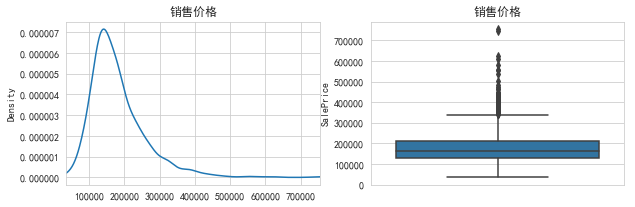

In [6]:
#查看要回归的属性：销售价格

fig = plt.figure(figsize=(10,3))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((1,2),(0,0))             # 在一张大图里分列几个小图
data_train.SalePrice.plot(kind='kde',xlim=(data_train.SalePrice.min(),data_train.SalePrice.max())) 
plt.title(u"销售价格") # 标题


plt.subplot2grid((1,2),(0,1))             # 在一张大图里分列几个小图
sns.boxplot( y="SalePrice", data=data_train)
plt.title(u"销售价格") # 标题

print(u'销售价格：SalePrice')

In [7]:
def showData(t,featereName,featureId):
    
    print(data_train[featureId].describe())
    
    _, ((axis1,axis2,axis3),(axis4,axis5,axis6)) = plt.subplots(2,3,figsize=(18,7))
    if t ==0:
        
        order = data_train[featureId].unique()
        print(order)
        
        sns.stripplot(x=featureId, y="SalePrice", data=data_train, ax=axis1)

        sns.barplot(x=featureId, y="SalePrice", data=data_train, ax=axis2, ci='sd').set_title(featereName)

        sns.boxplot(x=featureId, y="SalePrice", data=data_train, ax=axis3)

        sns.pointplot(x=featureId, y="SalePrice", data=data_train, ax=axis4, ci='sd')

        sns.countplot(x=featureId, data=data_train, ax=axis5,)

        sns.violinplot(x=featureId, y="SalePrice", data=data_train, ax=axis6)
    
    elif t ==1:
        data_train[featureId].plot(ax=axis1, kind ='kde')
        
        #data_train.plot(x=featureId, y='SalePrice',ax=axis2, kind ='scatter',title = featereName)
        sns.regplot(x=featureId, y="SalePrice", data=data_train, ax=axis2)

        data_train[featureId].plot(ax=axis3, kind ='box')

        data_train[featureId].plot(ax=axis4, kind ='hist')

        data_train.plot(x=featureId, y='SalePrice',ax=axis5, kind ='hexbin')

        data_train.plot(x=featureId, y='SalePrice',ax=axis6, kind ='area')

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


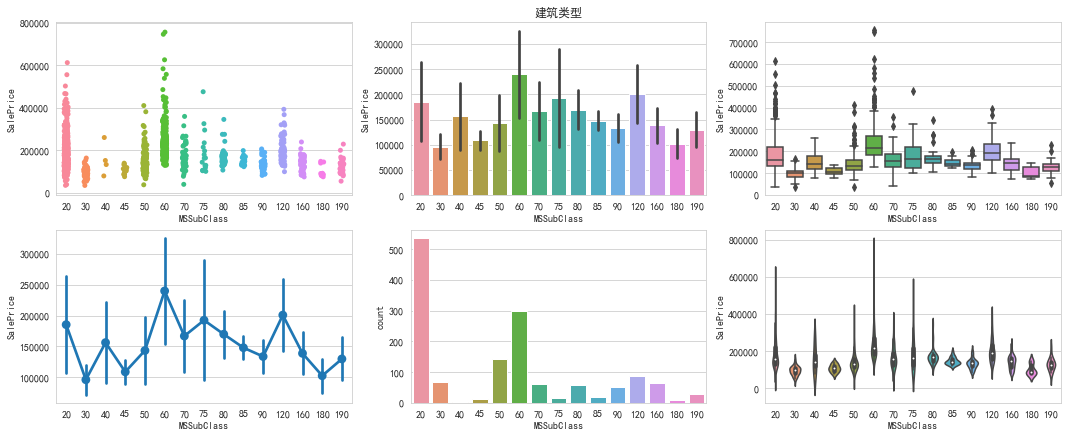

In [8]:
#建筑类型
featereName = u'建筑类型'
featureId = 'MSSubClass'

showData(0,featereName,featureId)

#有一些明显的属性

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
['RL' 'RM' 'C (all)' 'FV' 'RH']


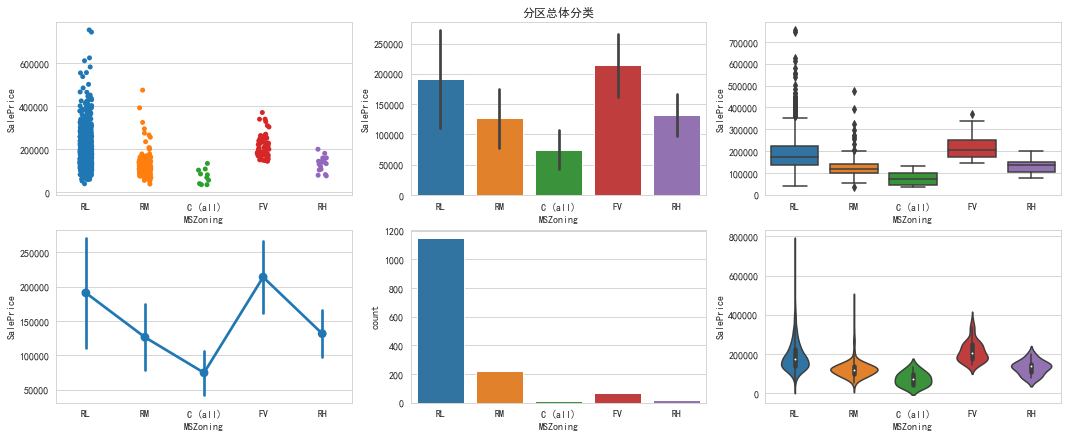

In [9]:
featereName = u'分区总体分类'
featureId = 'MSZoning'

showData(0,featereName,featureId)

#较明显的属性

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


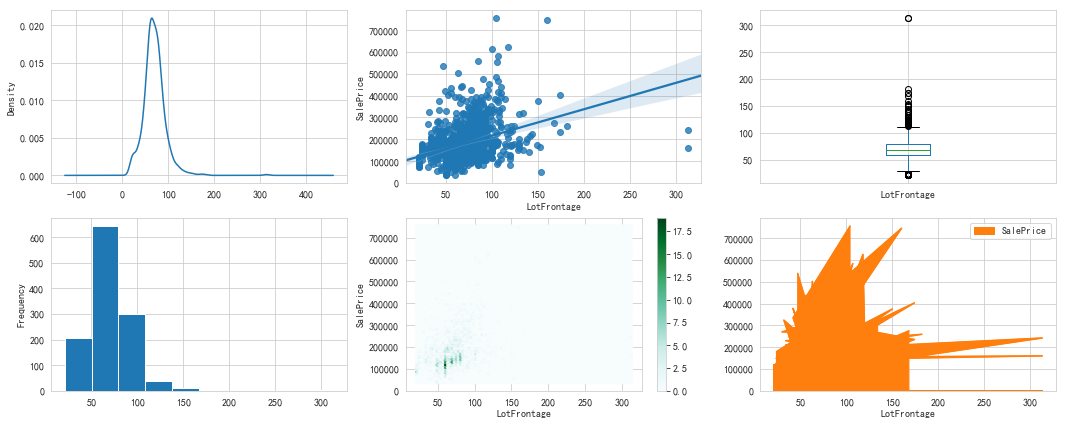

In [10]:
featereName = u'连接房产的距离'
featureId = 'LotFrontage'

showData(1,featereName,featureId)

#有缺失值
#有一些趋势

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


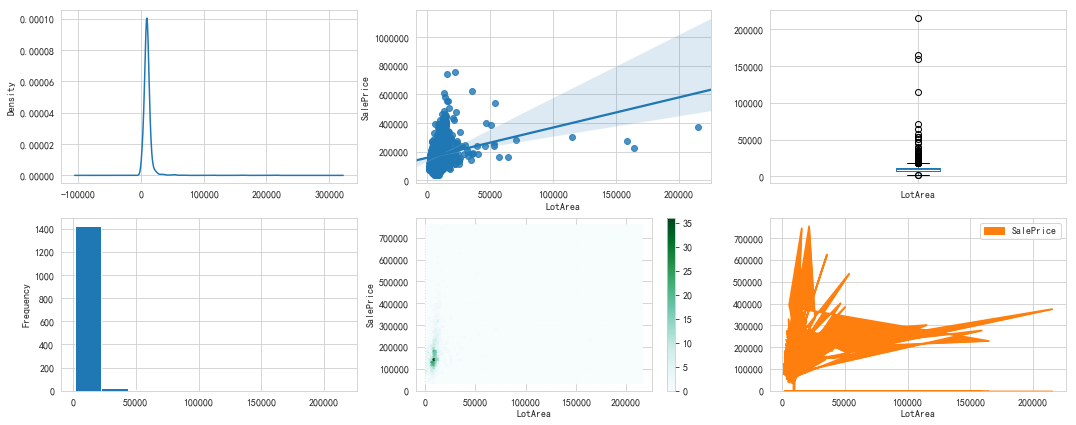

In [11]:
featereName = u'占地面积'
featureId = 'LotArea'

showData(1,featereName,featureId)

        
#相对明显的趋势

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
['Pave' 'Grvl']


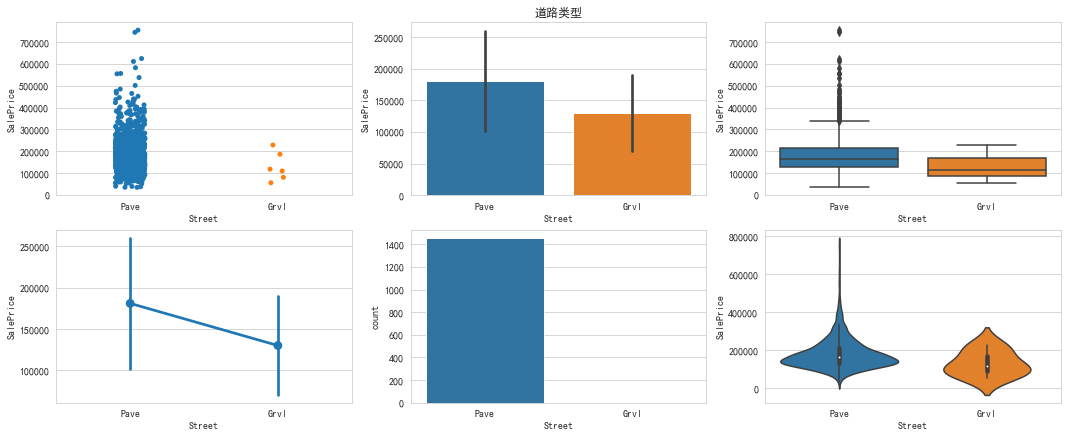

In [12]:
featereName = u'道路类型'
featureId = 'Street'

showData(0,featereName,featureId)

#建议舍弃，样本比例超级失衡

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
[nan 'Grvl' 'Pave']


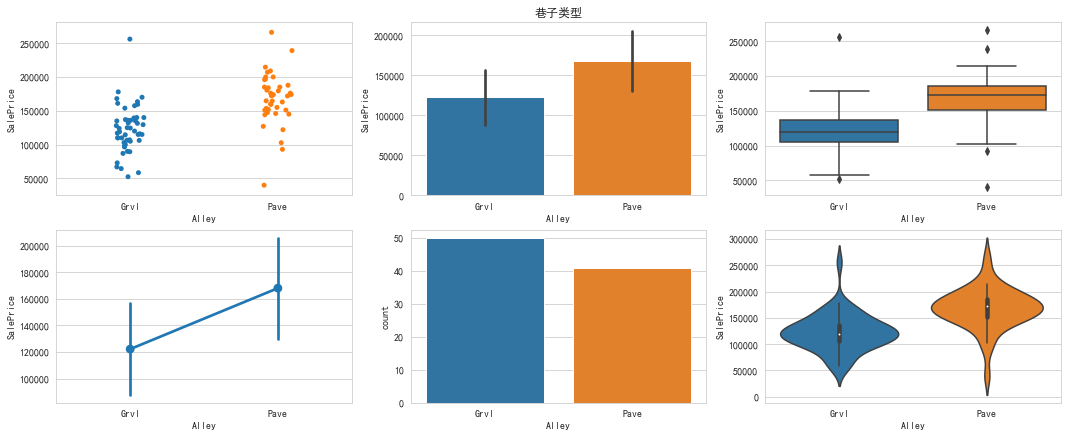

In [13]:
featereName = u'巷子类型'
featureId = 'Alley'

showData(0,featereName,featureId)

#信息还是附带了一些
#建议舍弃，样本缺失严重

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
['Reg' 'IR1' 'IR2' 'IR3']


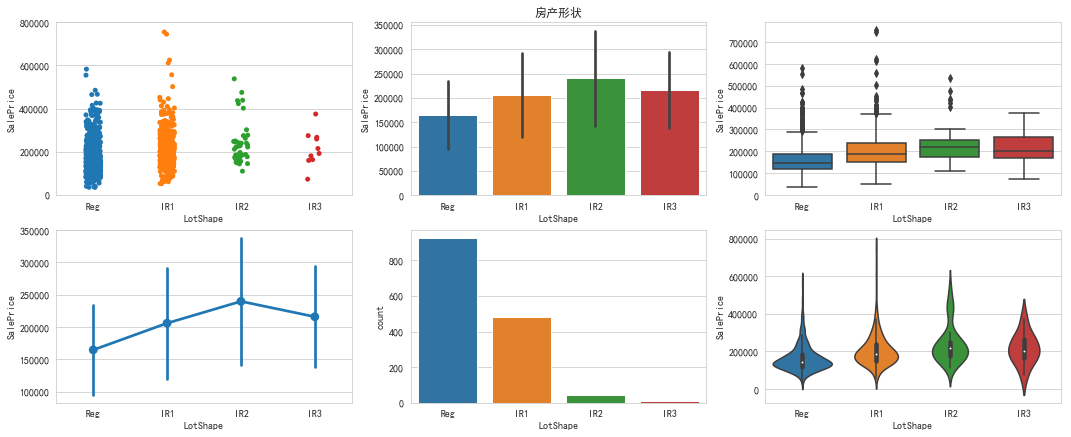

In [14]:
featereName = u'房产形状'
featureId = 'LotShape'

showData(0,featereName,featureId)

#样本分布比较不均衡
#附带了一些信息

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
['Lvl' 'Bnk' 'Low' 'HLS']


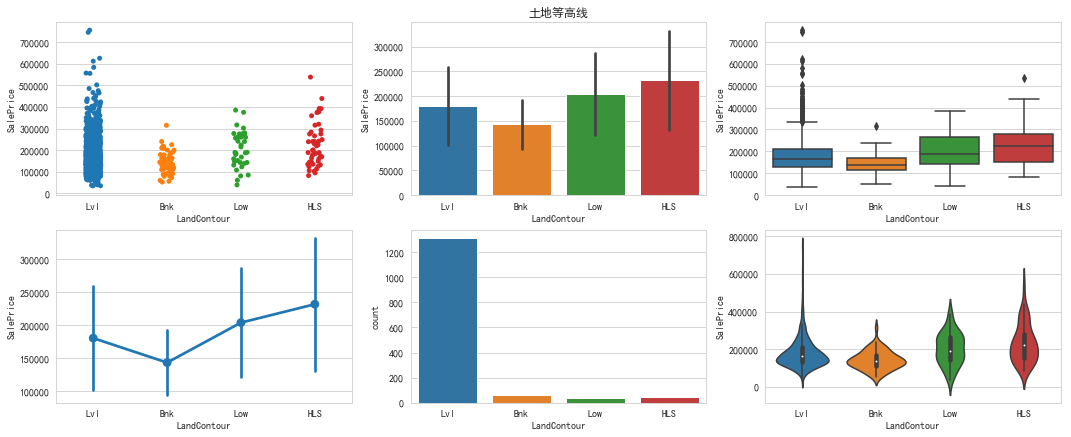

In [16]:
featereName = u'土地等高线'
featureId = 'LandContour'

showData(0,featereName,featureId)

#样本比例比较不均衡
#附带了一些信息

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
['AllPub' 'NoSeWa']


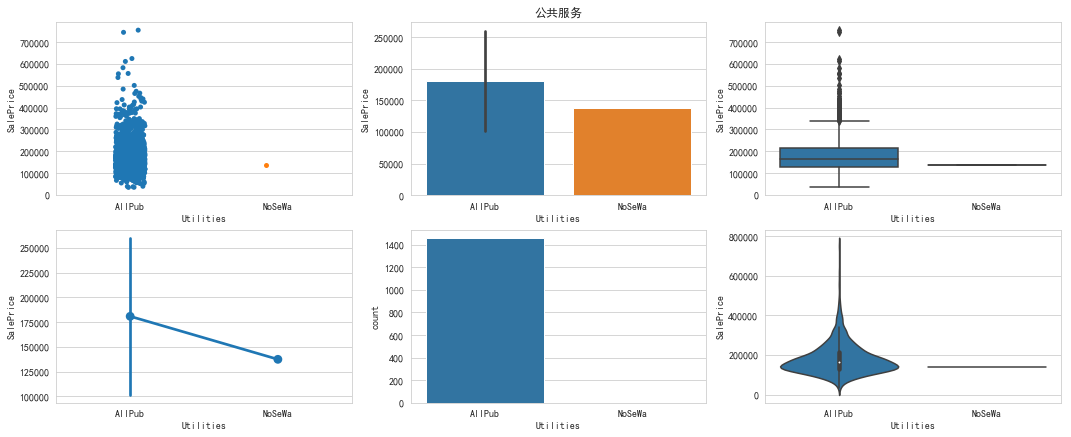

In [17]:
featereName = u'公共服务'
featureId = 'Utilities'

showData(0,featereName,featureId)

#样本极度不平衡，不可用属性

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


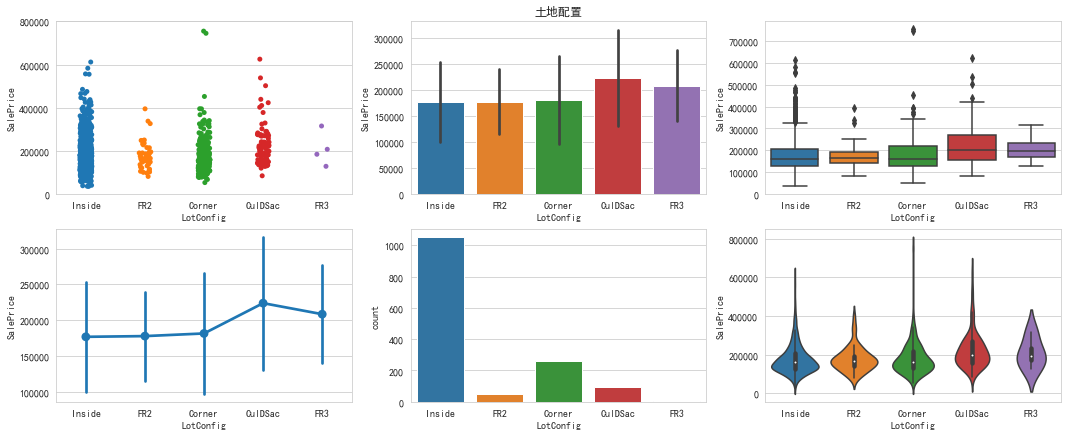

In [18]:
featereName = u'土地配置'
featureId = 'LotConfig'

showData(0,featereName,featureId)

#样本分布比较不均衡
#各类间区别不大

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
['Gtl' 'Mod' 'Sev']


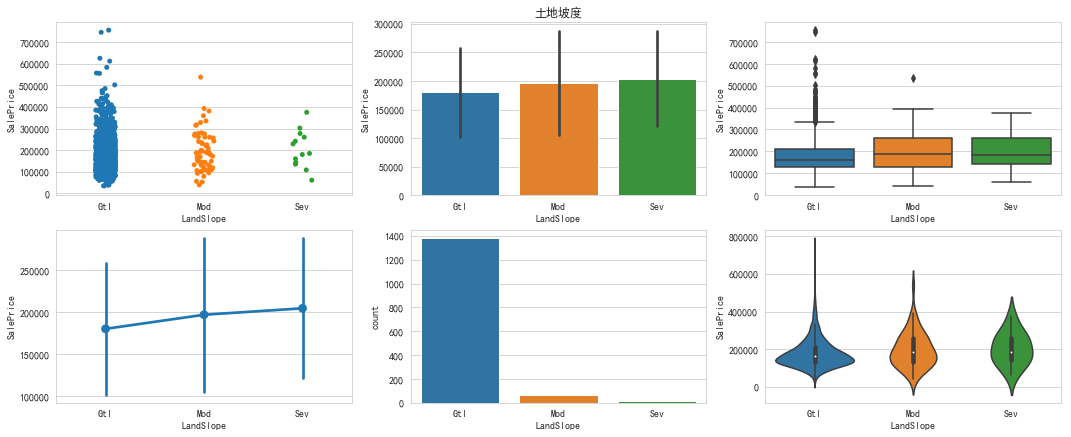

In [19]:
featereName = u'土地坡度'
featureId = 'LandSlope'

showData(0,featereName,featureId)

#样本比例较不均衡
#附带少量信息

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


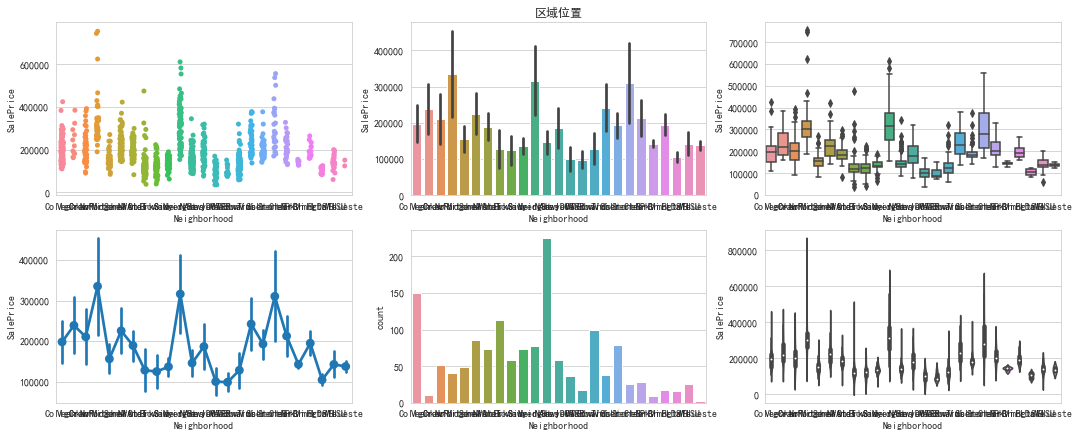

In [21]:
featereName = u'区域位置'
featureId = 'Neighborhood'

showData(0,featereName,featureId)

#附带较多信息，一个比较优秀的特征

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


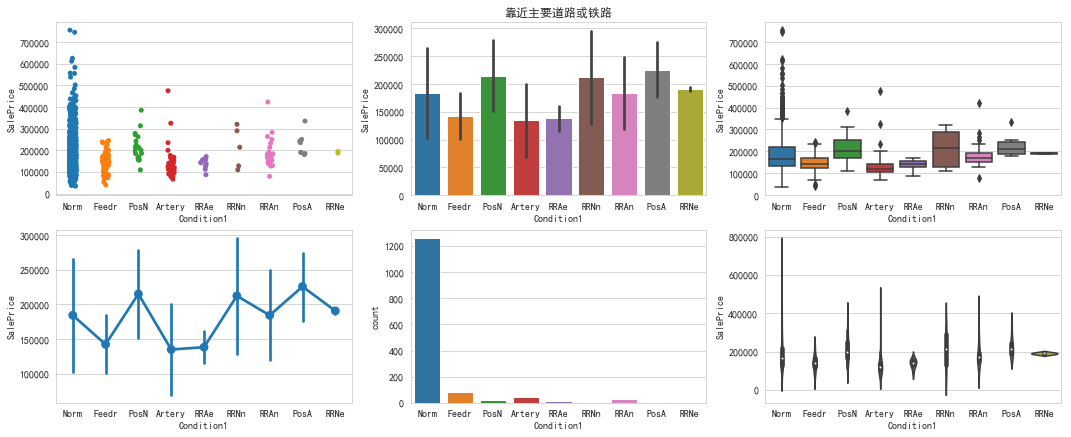

In [22]:
featereName = u'靠近主要道路或铁路'
featureId = 'Condition1'

showData(0,featereName,featureId)

#样本比较不均衡
#附带一些信息

count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


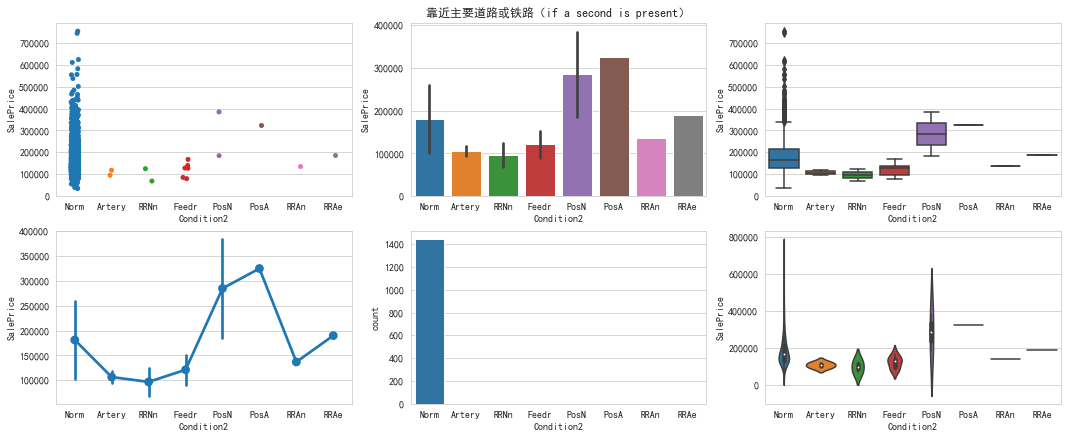

In [23]:
featereName = u'靠近主要道路或铁路（if a second is present）'
featureId = 'Condition2'

showData(0,featereName,featureId)

#样本极度不平衡
#考虑放弃这个属性

count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


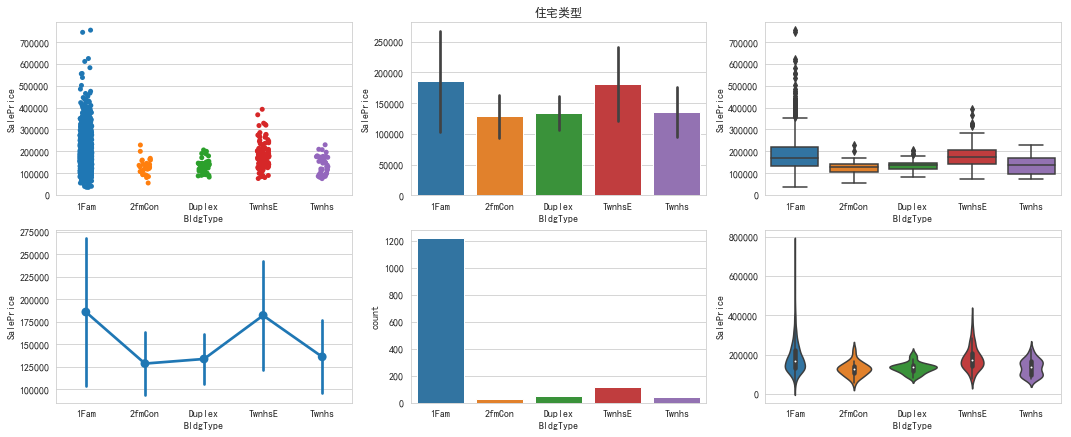

In [24]:
featereName = u'住宅类型'
featureId = 'BldgType'

showData(0,featereName,featureId)

#样本分布不均衡
#附带一些信息，不明显

count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


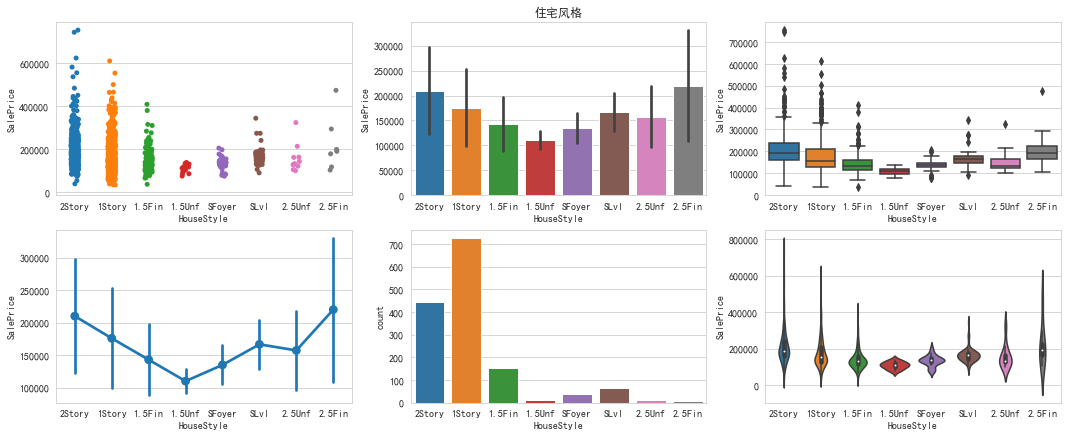

In [25]:
featereName = u'住宅风格'
featureId = 'HouseStyle'

showData(0,featereName,featureId)

#附带一些信息
#部分分类分布不均衡

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
[ 7  6  8  5  9  4 10  3  1  2]


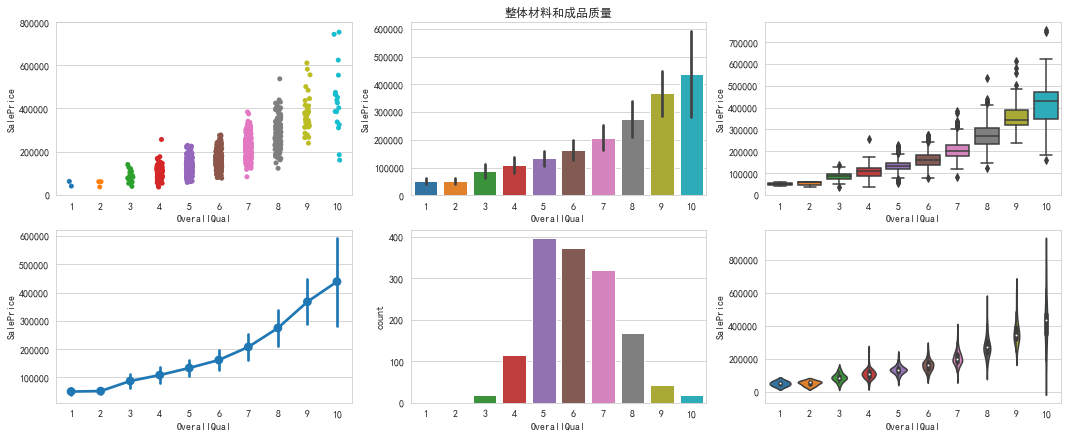

In [30]:
featereName = u'整体材料和成品质量'
featureId = 'OverallQual'

showData(0,featereName,featureId)

#showData(1,featereName,featureId)

#局部种类分布不均
#携带十分明显信息的特征

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
[5 8 6 7 4 2 3 9 1]


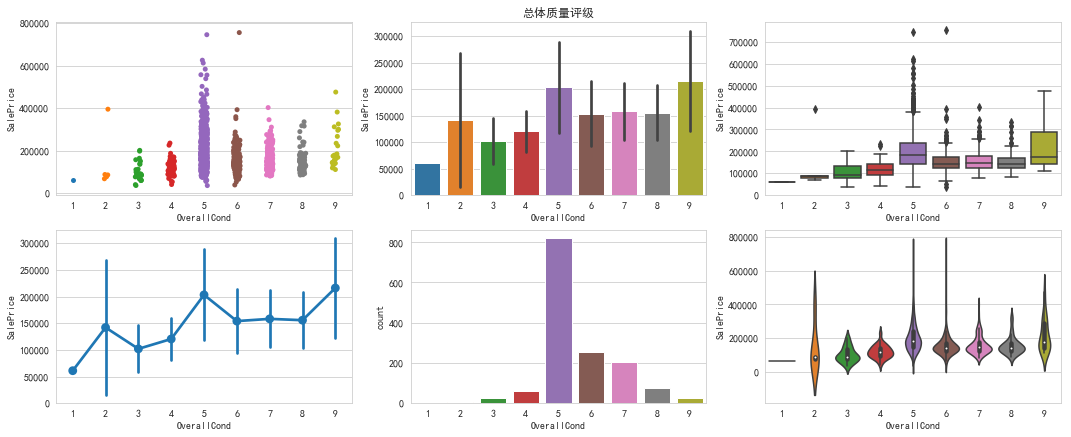

In [31]:
featereName = u'总体质量评级'
featureId = 'OverallCond'

showData(0,featereName,featureId)

#showData(1,featereName,featureId)

#部分样本分布不均衡
#不明显的特征

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


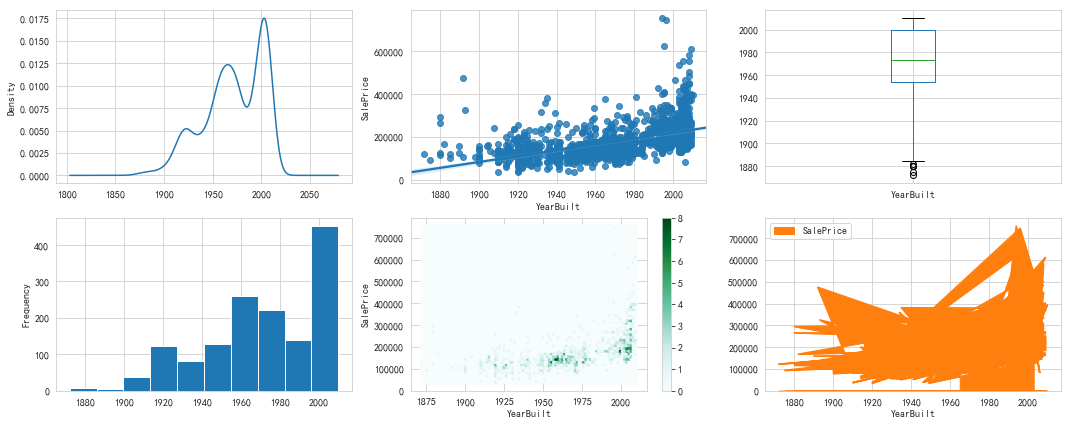

In [35]:
featereName = u'原始施工日期'
featureId = 'YearBuilt'

#showData(0,featereName,featureId)

showData(1,featereName,featureId)

#相对有用的特征

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


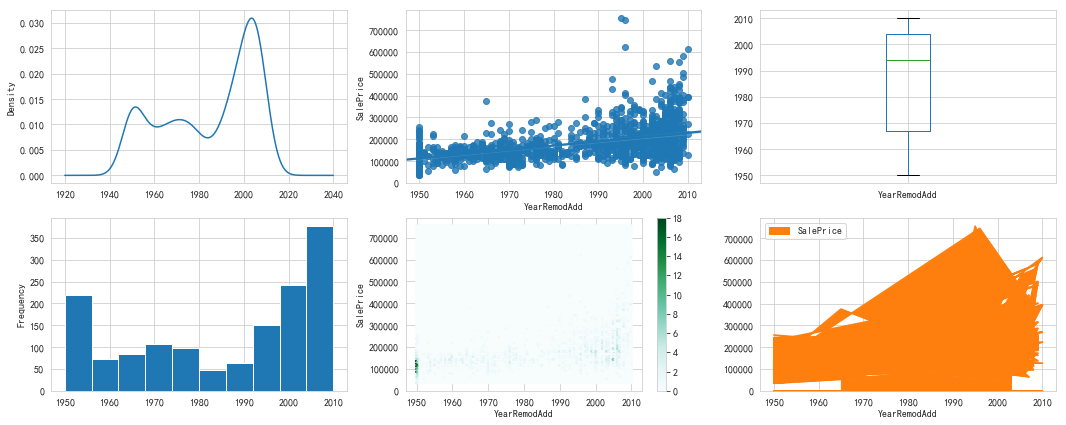

In [36]:
featereName = u'改造日期'
featureId = 'YearRemodAdd'

#showData(0,featereName,featureId)
showData(1,featereName,featureId)

#携带一些信息

count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


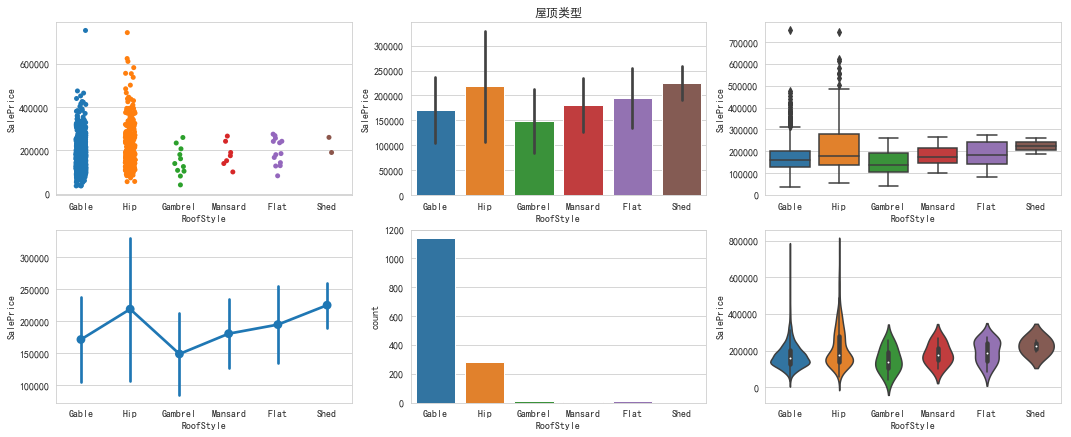

In [37]:
featereName = u'屋顶类型'
featureId = 'RoofStyle'

showData(0,featereName,featureId)


#样本不均衡
#携带不明显的信息

count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


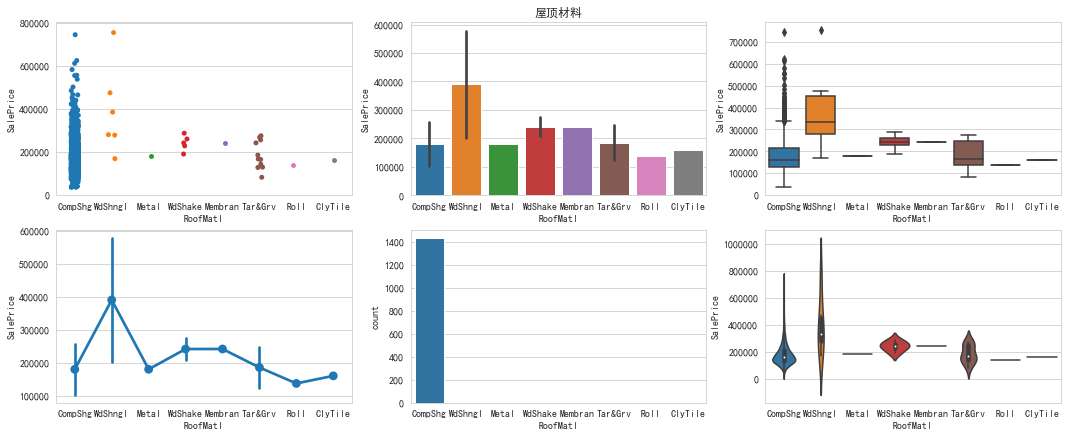

In [38]:
featereName = u'屋顶材料'
featureId = 'RoofMatl'

showData(0,featereName,featureId)

#样本极度不平衡，考虑放弃

count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


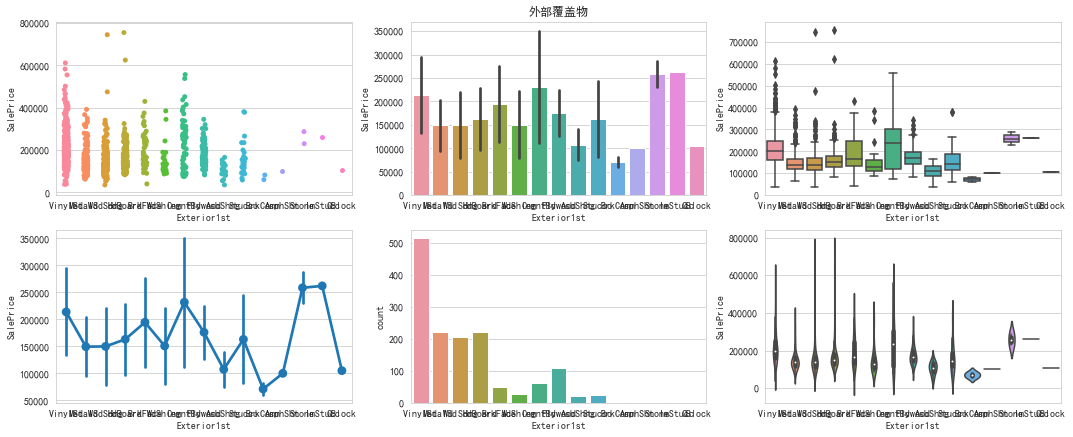

In [39]:
featereName = u'外部覆盖物'
featureId = 'Exterior1st'

showData(0,featereName,featureId)

#携带一些信息

count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


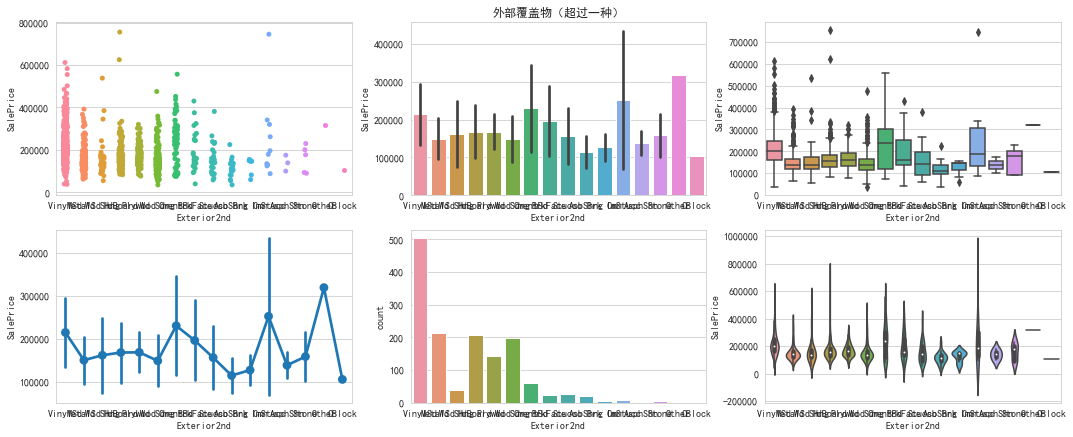

In [40]:
featereName = u'外部覆盖物（超过一种）'
featureId = 'Exterior2nd'

showData(0,featereName,featureId)

#携带一些信息

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


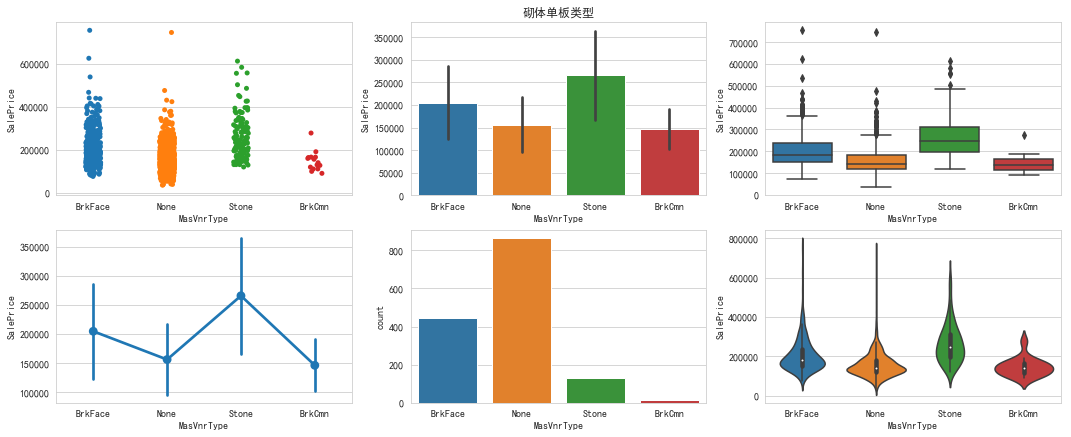

In [41]:
featereName = u'砌体单板类型'
featureId = 'MasVnrType'

showData(0,featereName,featureId)

#携带一些信息

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


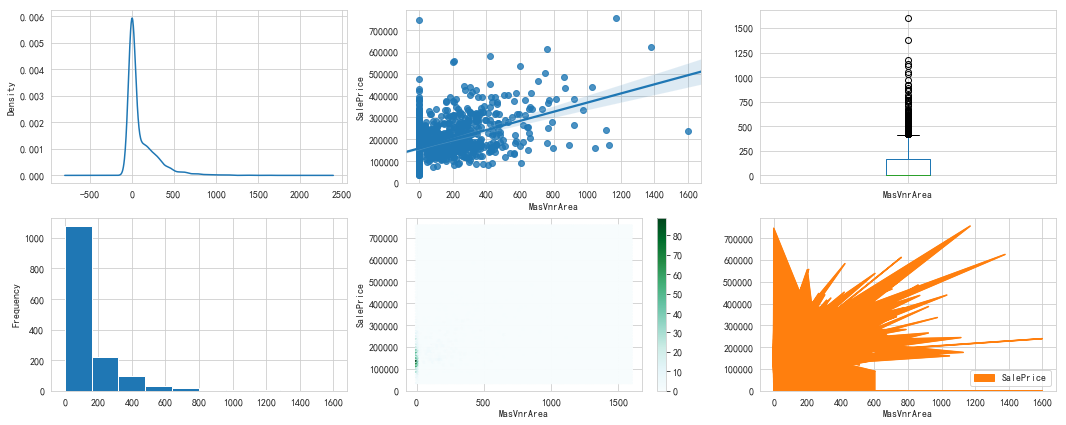

In [43]:
featereName = u'砌体单板区域面积'
featureId = 'MasVnrArea'

showData(1,featereName,featureId)

#携带一些信息

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
['Gd' 'TA' 'Ex' 'Fa']


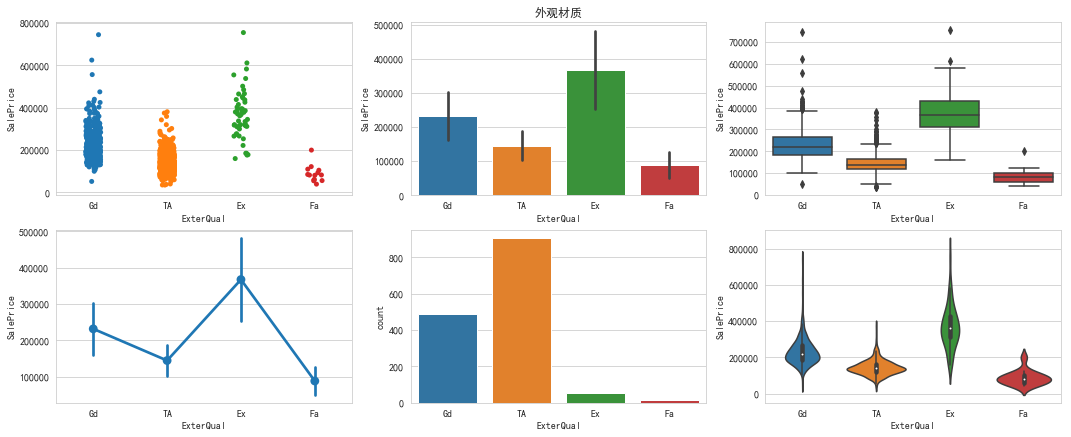

In [44]:
featereName = u'外观材质'
featureId = 'ExterQual'

showData(0,featereName,featureId)

#携带一些信息

count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object
['TA' 'Gd' 'Fa' 'Po' 'Ex']


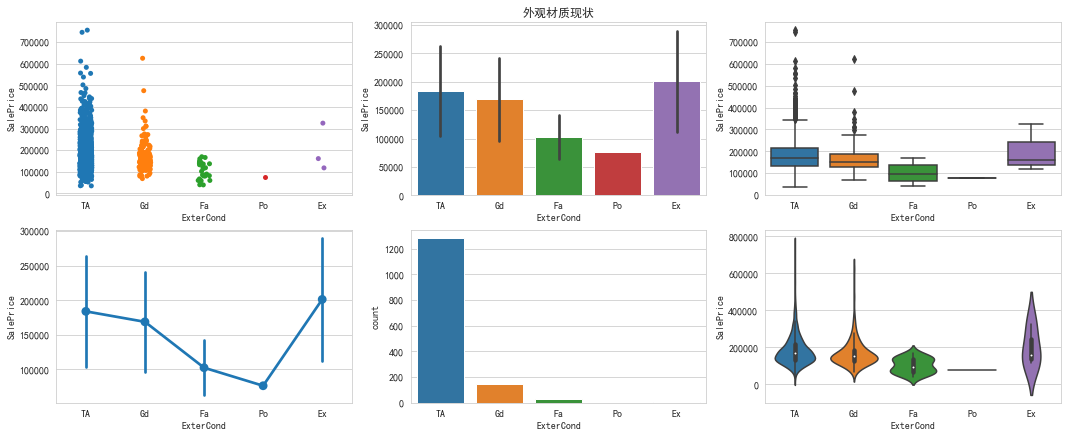

In [46]:
featereName = u'外观材质现状'
featureId = 'ExterCond'

showData(0,featereName,featureId)

#样本分布不均衡
#携带少量信息，建议弃用

count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


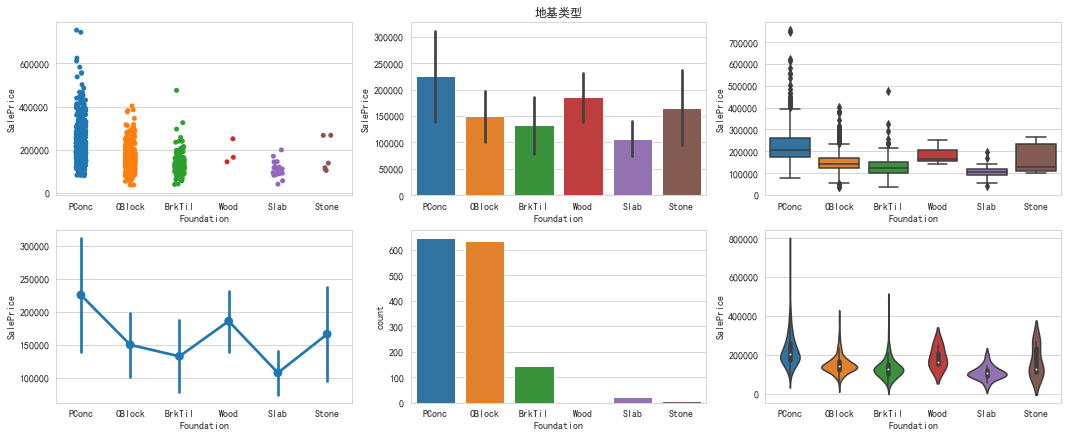

In [47]:
featereName = u'地基类型'
featureId = 'Foundation'

showData(0,featereName,featureId)

#部分样本不均衡，携带一些信息

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
['Gd' 'TA' 'Ex' nan 'Fa']


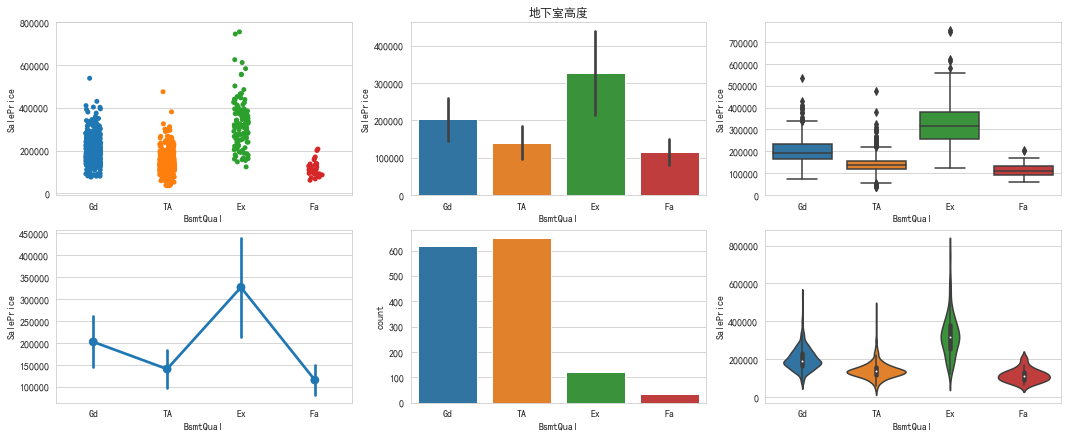

In [48]:
featereName = u'地下室高度'
featureId = 'BsmtQual'

showData(0,featereName,featureId)

#有缺失值
#携带了一些信息

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
['TA' 'Gd' nan 'Fa' 'Po']


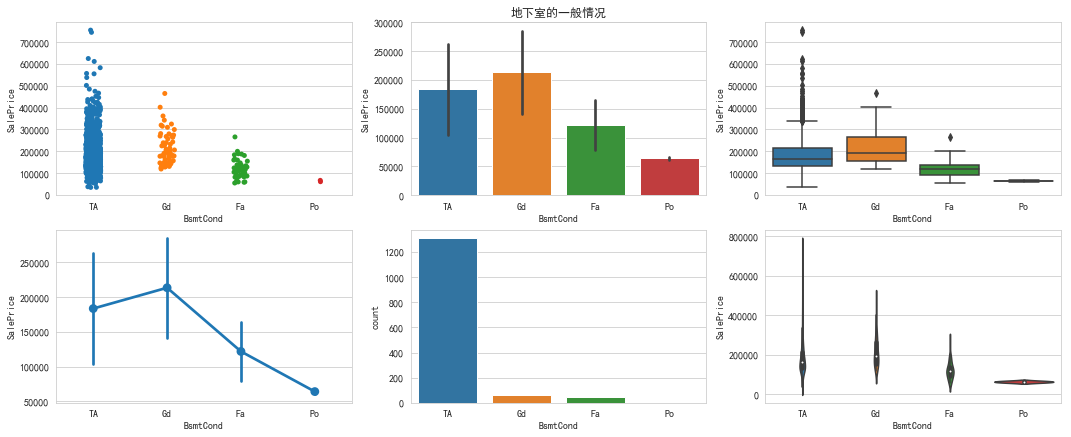

In [49]:
featereName = u'地下室的一般情况'
featureId = 'BsmtCond'

showData(0,featereName,featureId)

#有缺失值
#样本比例失衡
#携带了一些信息

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
['No' 'Gd' 'Mn' 'Av' nan]


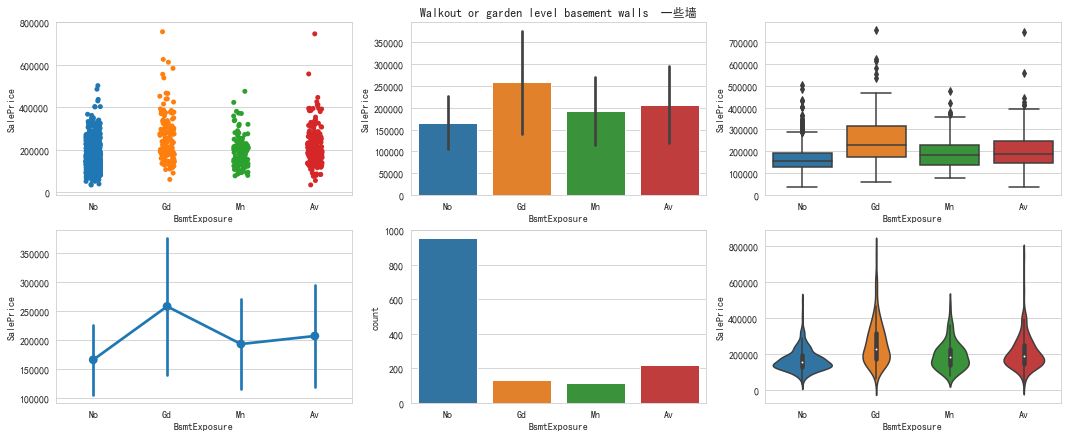

In [50]:
featereName = u'Walkout or garden level basement walls  一些墙'
featureId = 'BsmtExposure'

showData(0,featereName,featureId)


#有缺失值
#携带一些信息
#比例有些失衡

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


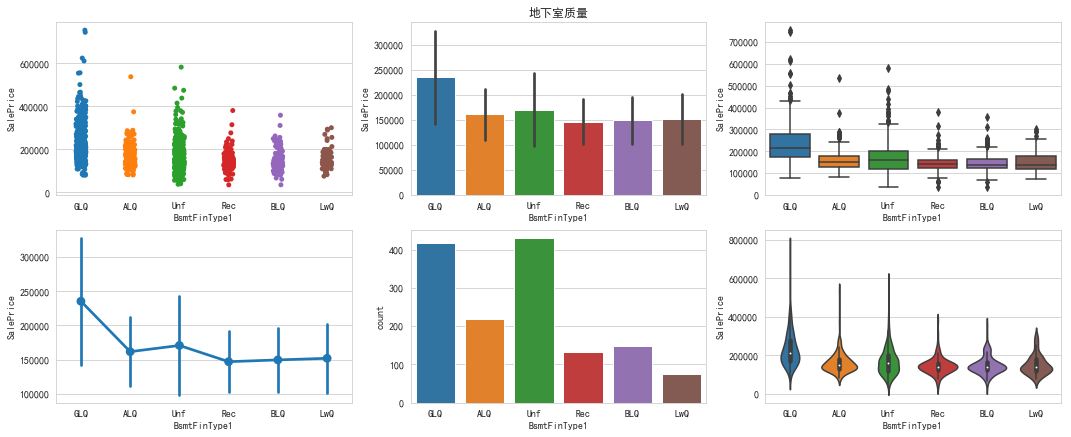

In [51]:
featereName = u'地下室质量'
featureId = 'BsmtFinType1'

showData(0,featereName,featureId)

#有缺失值
#携带一些信息

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


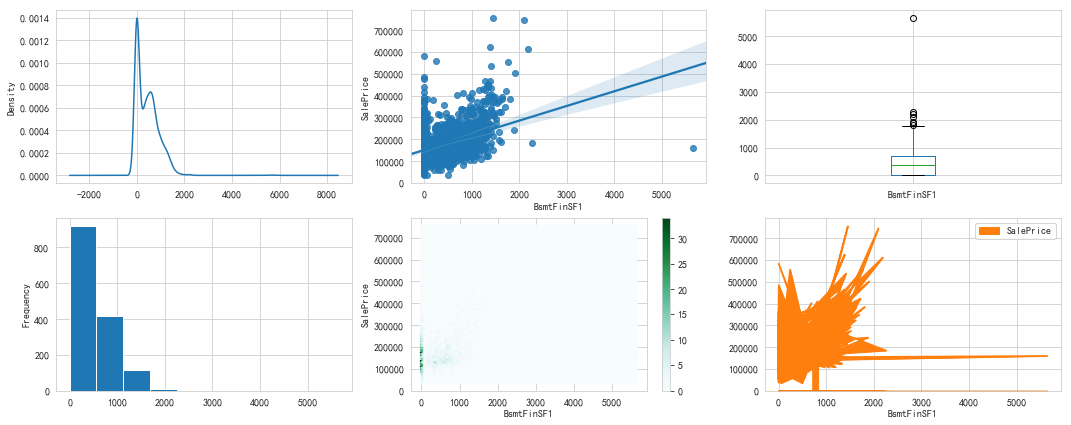

In [52]:
featereName = u'类型一完成区域'
featureId = 'BsmtFinSF1'

showData(1,featereName,featureId)

#携带一些信息

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


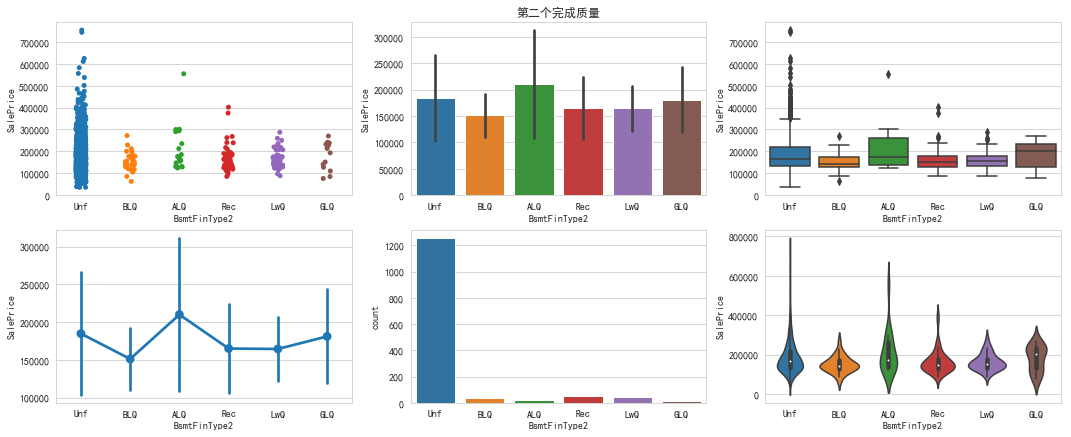

In [54]:
featereName = u'第二个完成质量'
featureId = 'BsmtFinType2'

showData(0,featereName,featureId)

#有缺失值
#携带一些信息

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


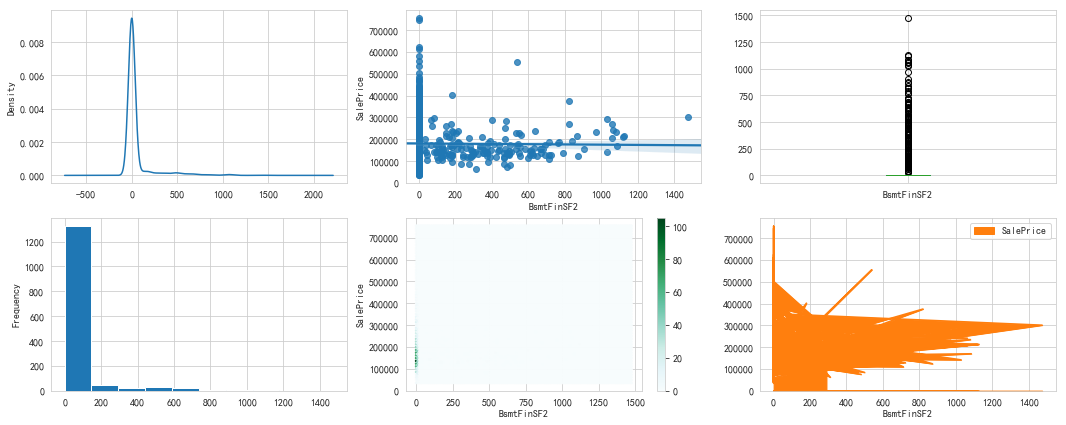

In [58]:
featereName = u'第二个地下室面积'
featureId = 'BsmtFinSF2'

showData(1,featereName,featureId)

#看上去不像有用的特征

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


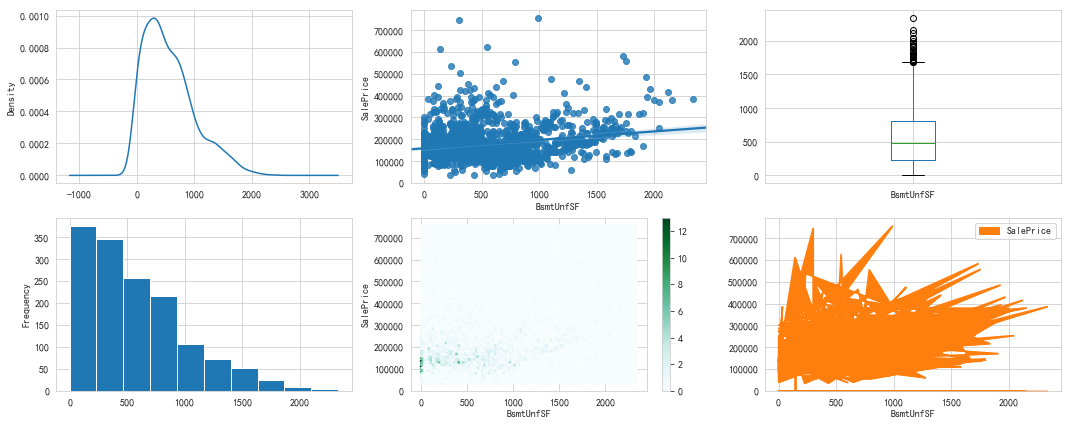

In [59]:
featereName = u'未完工地下室面积'
featureId = 'BsmtUnfSF'

showData(1,featereName,featureId)

#携带一些信息

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


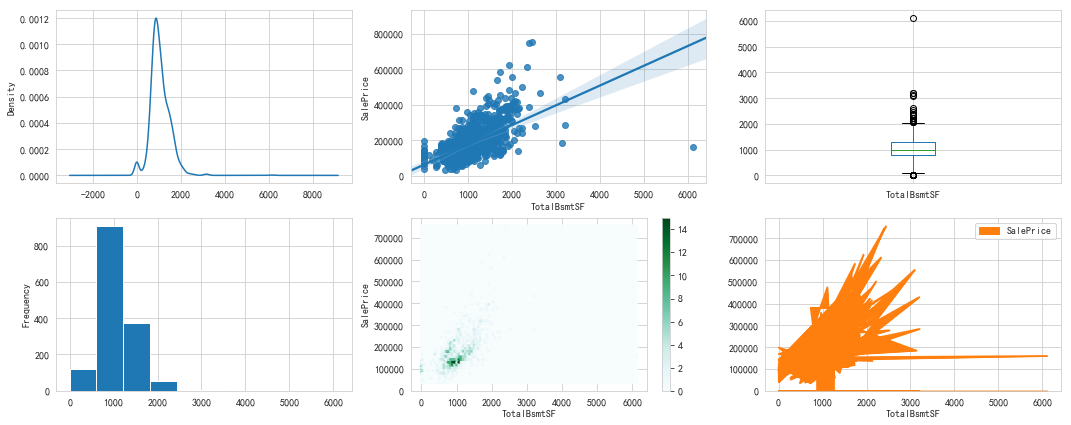

In [60]:
featereName = u'地下室总面积'
featureId = 'TotalBsmtSF'

showData(1,featereName,featureId)

#相对明显的特征

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


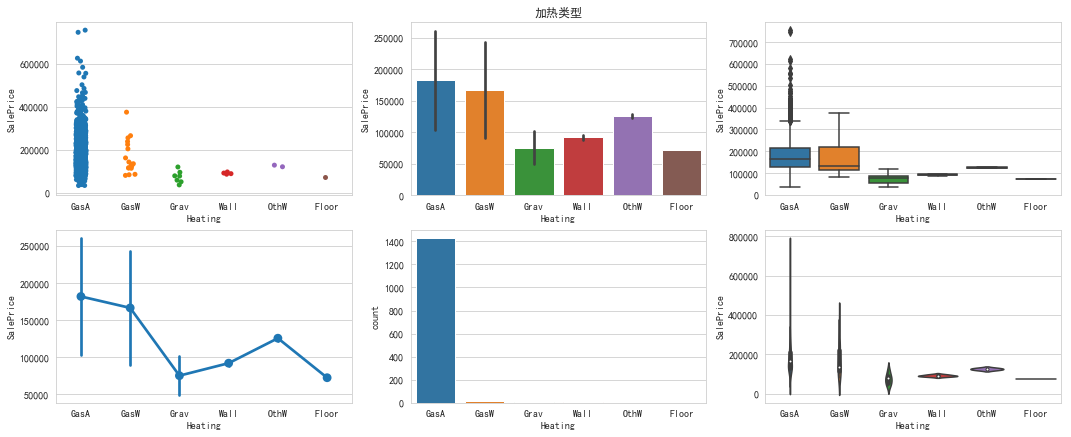

In [61]:
featereName = u'加热类型'
featureId = 'Heating'

showData(0,featereName,featureId)

#样本分布很不均衡

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object
['Ex' 'Gd' 'TA' 'Fa' 'Po']


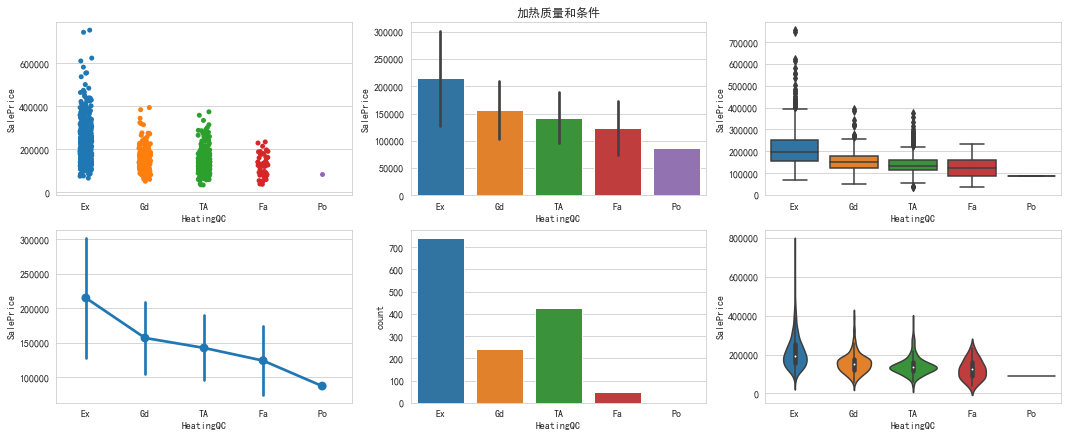

In [62]:
featereName = u'加热质量和条件'
featureId = 'HeatingQC'

showData(0,featereName,featureId)

#携带一些信息

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object
['Y' 'N']


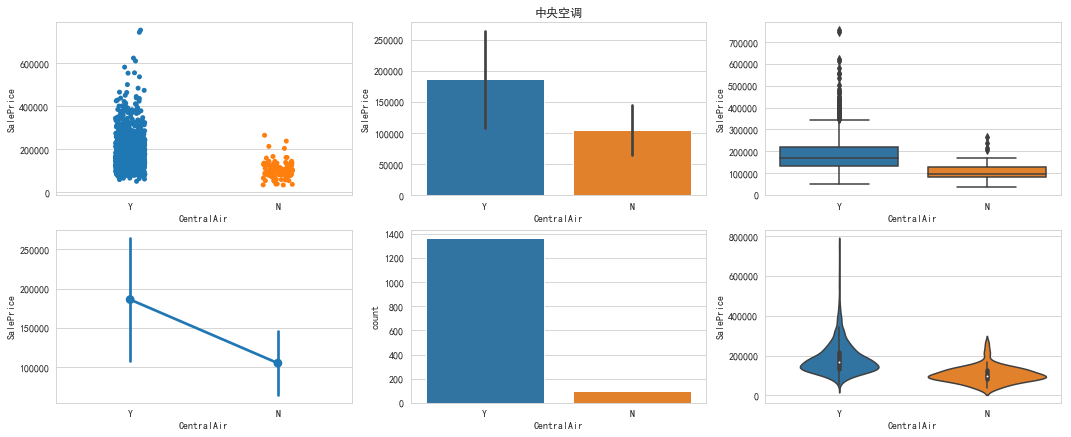

In [63]:
featereName = u'中央空调'
featureId = 'CentralAir'

showData(0,featereName,featureId)

#样本不均衡，携带一些信息

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


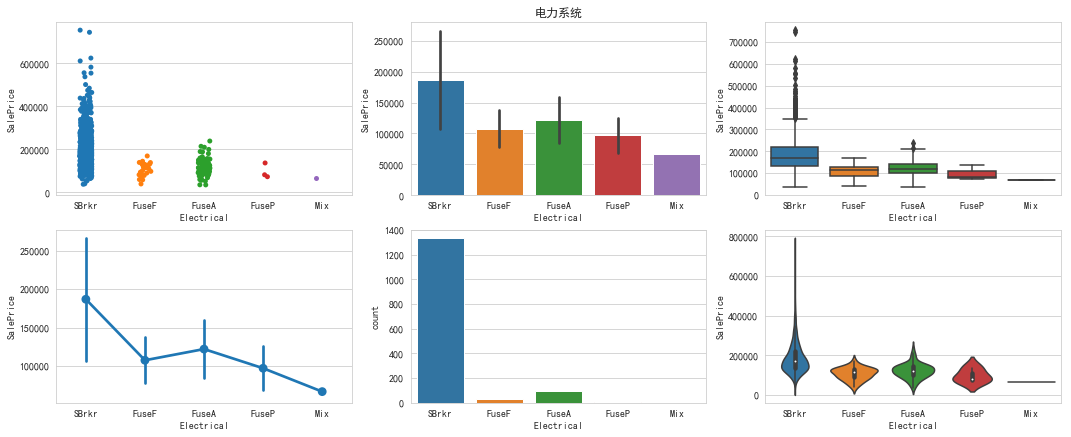

In [64]:
featereName = u'电力系统'
featureId = 'Electrical'

showData(0,featereName,featureId)

#样本分布很不均衡，有一个缺失值
#建议放弃

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


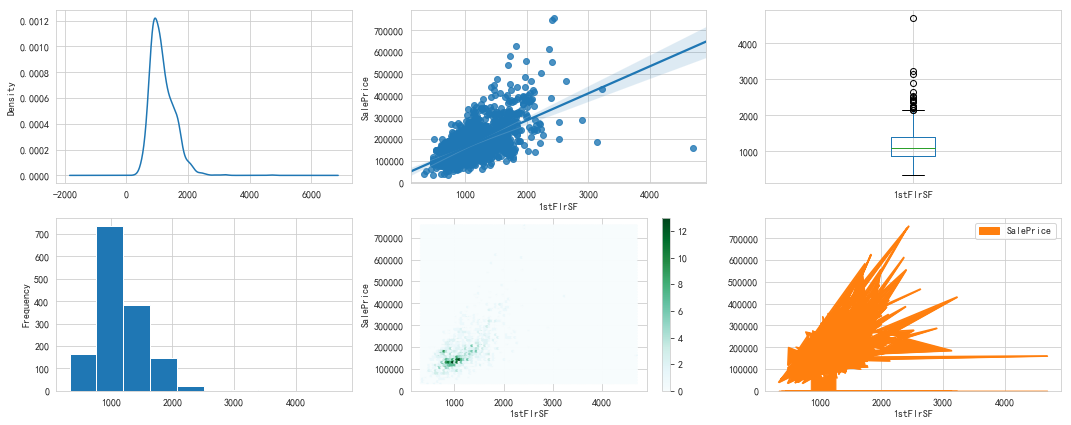

In [65]:
featereName = u'一层面积'
featureId = '1stFlrSF'

showData(1,featereName,featureId)

#相对明显的特征

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


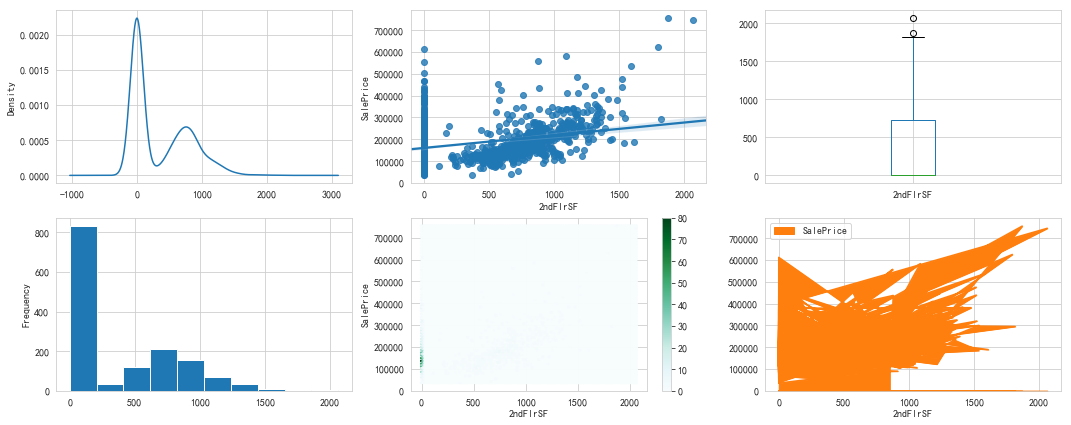

In [66]:
featereName = u'2层面积'
featureId = '2ndFlrSF'

showData(1,featereName,featureId)

#携带一些信息

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


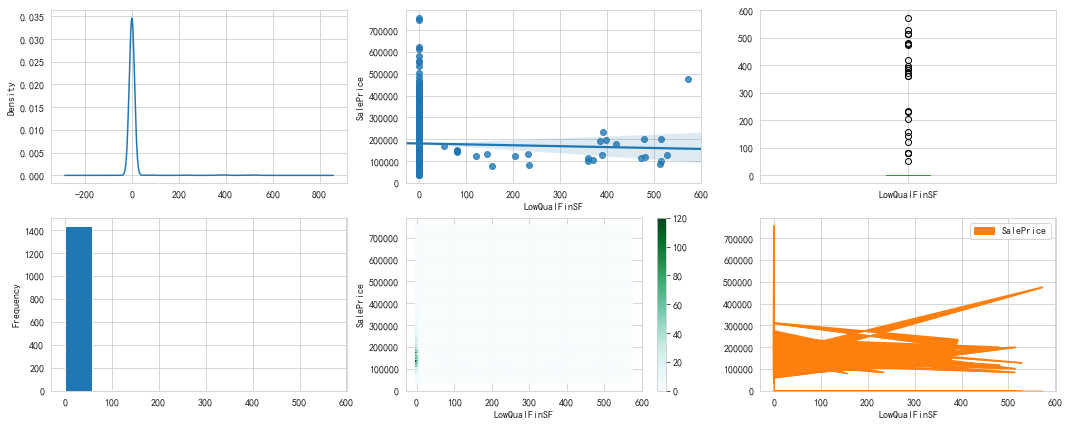

In [67]:
featereName = u'低质量完工区域'
featureId = 'LowQualFinSF'

showData(1,featereName,featureId)


#分布不均衡，感觉不是一个有用的特征，建议弃用

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


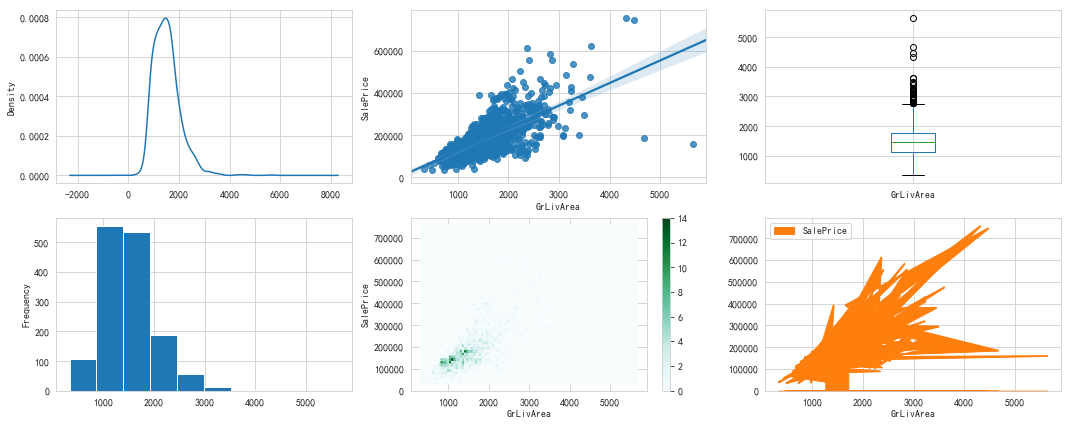

In [68]:
featereName = u'生活区面积'
featureId = 'GrLivArea'

showData(1,featereName,featureId)

#明显的特征

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
[1 0 2 3]


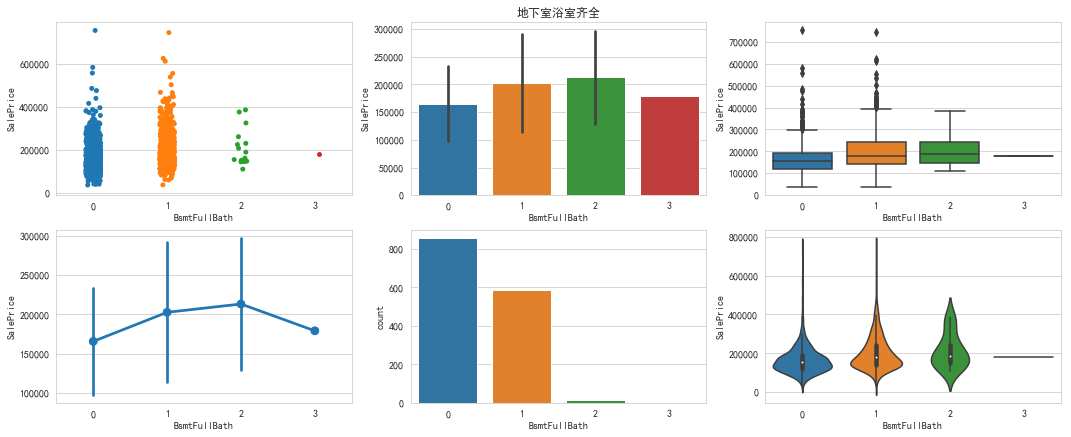

In [70]:
featereName = u'地下室浴室齐全'
featureId = 'BsmtFullBath'

showData(0,featereName,featureId)


#有一些信息

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
[0 1 2]


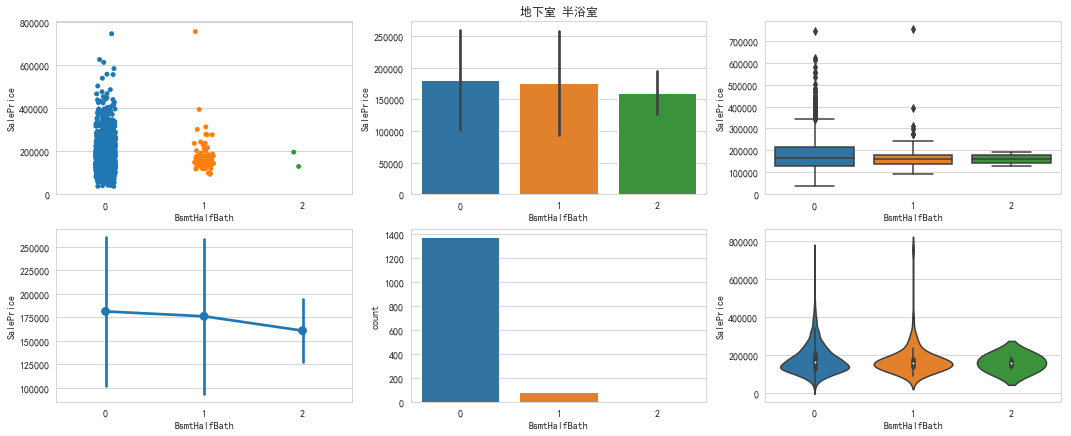

In [71]:
featereName = u'地下室 半浴室'
featureId = 'BsmtHalfBath'

showData(0,featereName,featureId)

#样本分布不均衡，感觉携带信息不明显

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
[2 1 3 0]


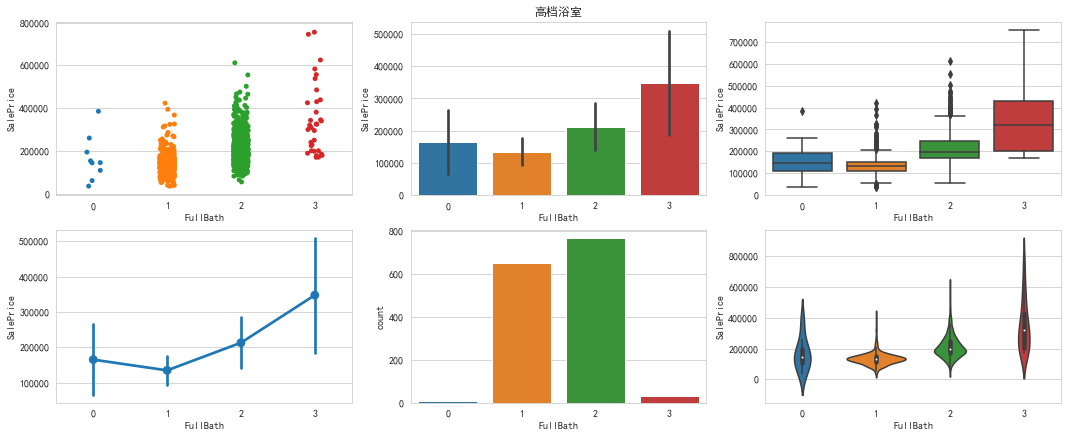

In [72]:
featereName = u'高档浴室'
featureId = 'FullBath'

showData(0,featereName,featureId)

#样本不均衡，携带相对明显的信息

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
[1 0 2]


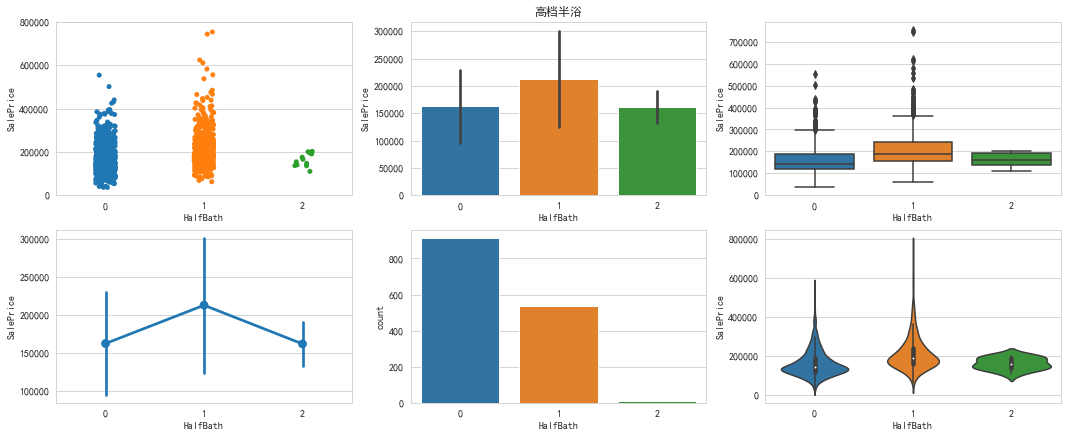

In [73]:
featereName = u'高档半浴'
featureId = 'HalfBath'

showData(0,featereName,featureId)

#分布不均衡，相对明显的数据


count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
[3 4 1 2 0 5 6 8]
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


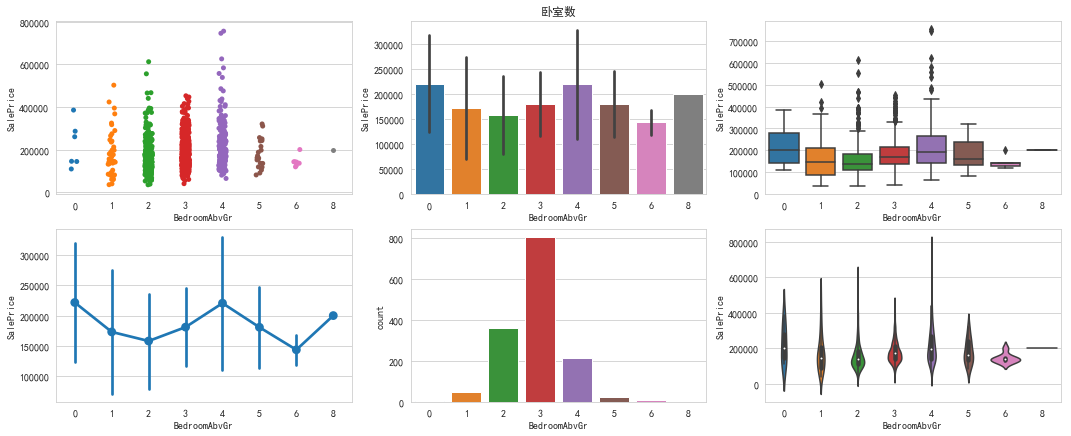

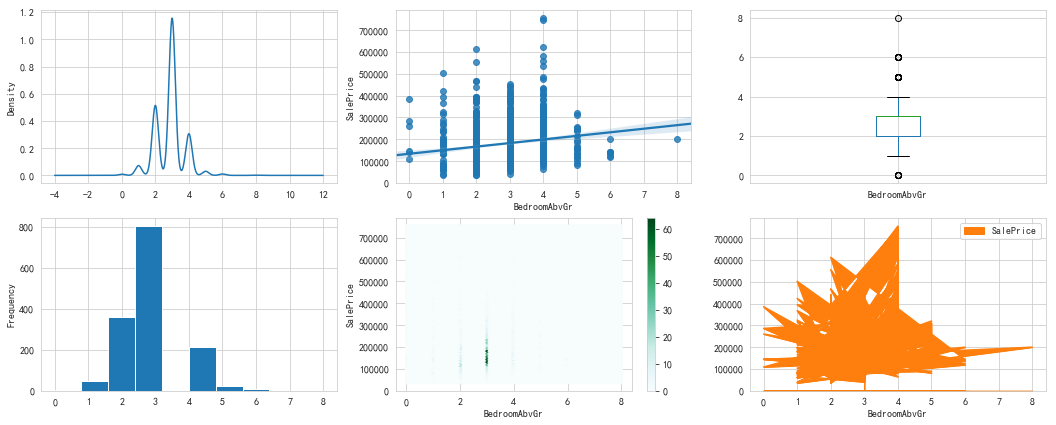

In [76]:
featereName = u'卧室数'
featureId = 'BedroomAbvGr'

showData(0,featereName,featureId)
showData(1,featereName,featureId)


#样本分布不均，携带一些信息

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
[1 2 3 0]
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


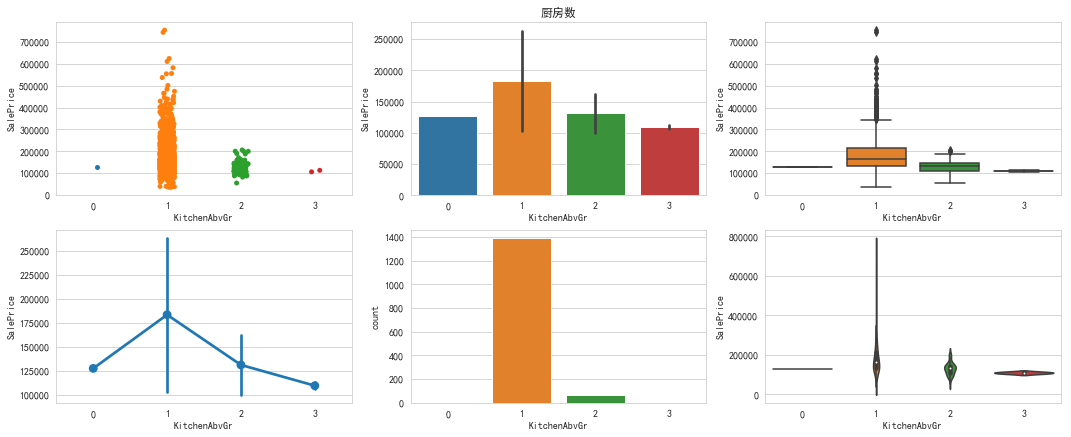

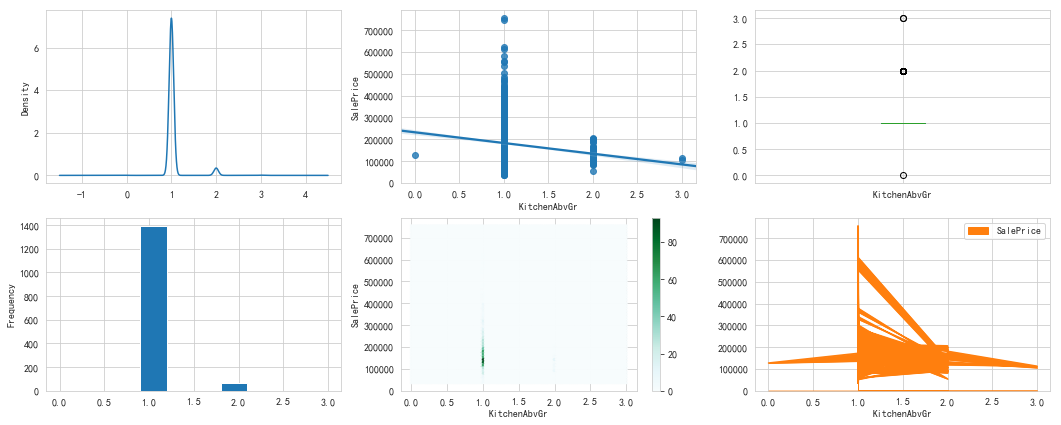

In [79]:
featereName = u'厨房数'
featureId = 'KitchenAbvGr'

showData(0,featereName,featureId)
showData(1,featereName,featureId)

#样本分布不均
#建议弃用

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object
['Gd' 'TA' 'Ex' 'Fa']


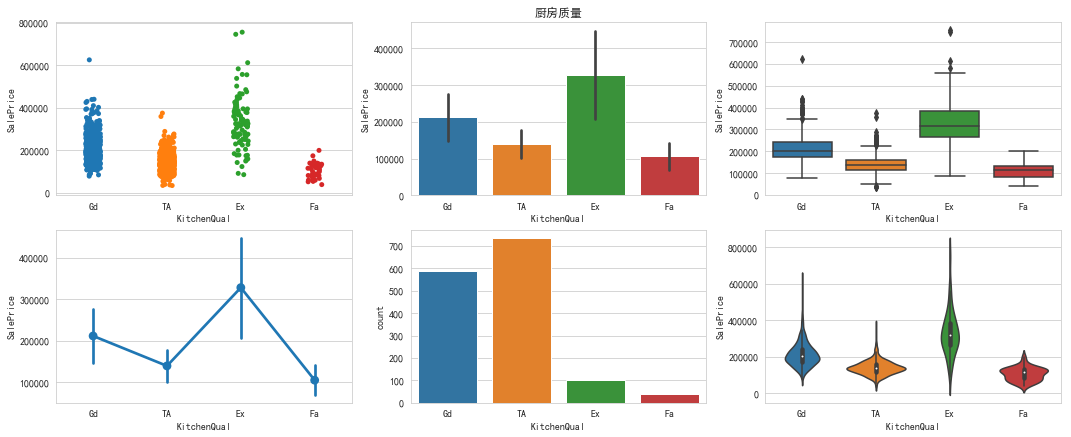

In [80]:
featereName = u'厨房质量'
featureId = 'KitchenQual'

showData(0,featereName,featureId)

#携带相对明显的信息

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
[ 8  6  7  9  5 11  4 10 12  3  2 14]
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


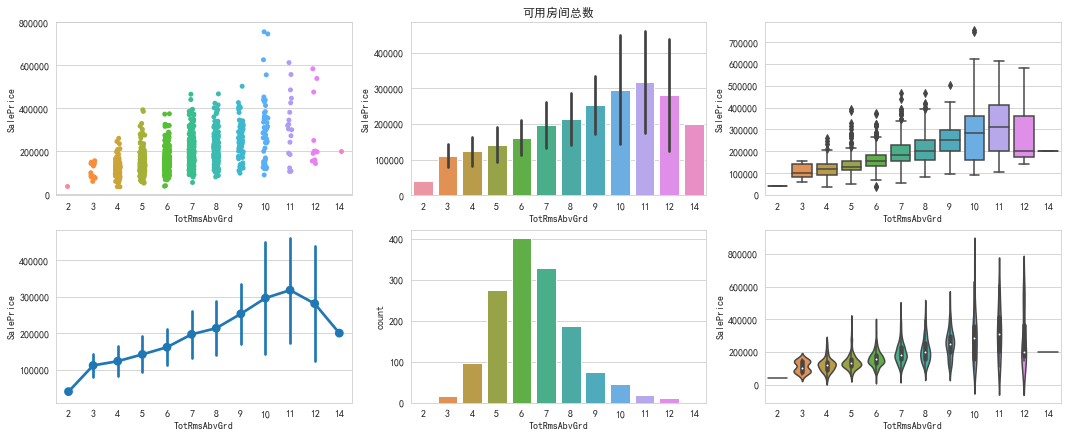

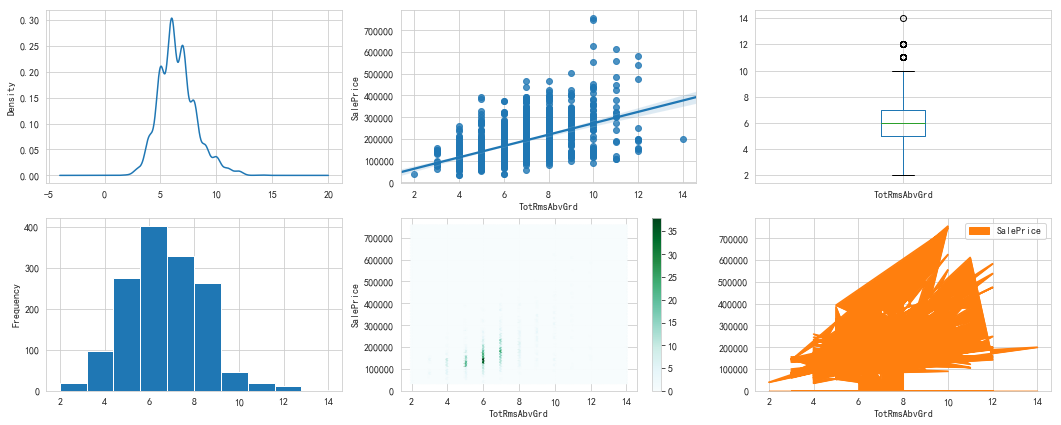

In [82]:
featereName = u'可用房间总数'
featureId = 'TotRmsAbvGrd'

showData(0,featereName,featureId)
showData(1,featereName,featureId)

#明显的特征

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


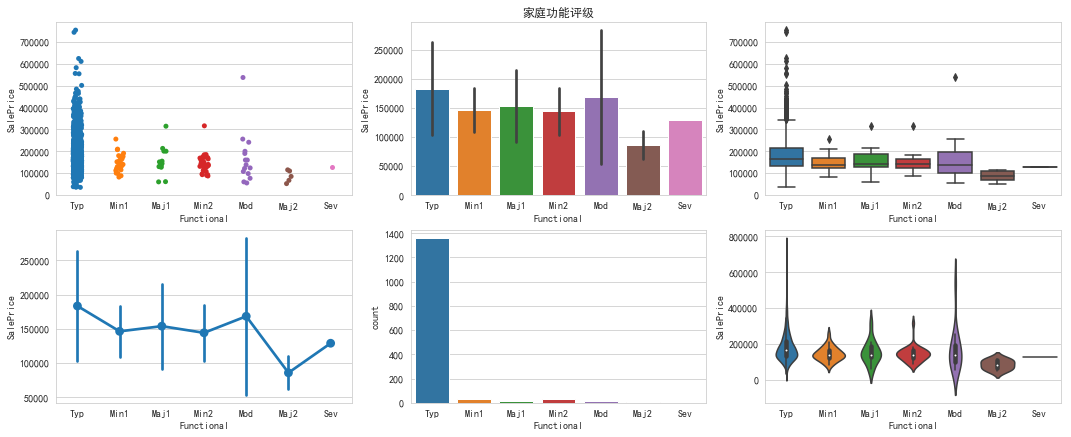

In [83]:
featereName = u'家庭功能评级'
featureId = 'Functional'

showData(0,featereName,featureId)

#样本分布十分不均，建议弃用

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
[0 1 2 3]
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


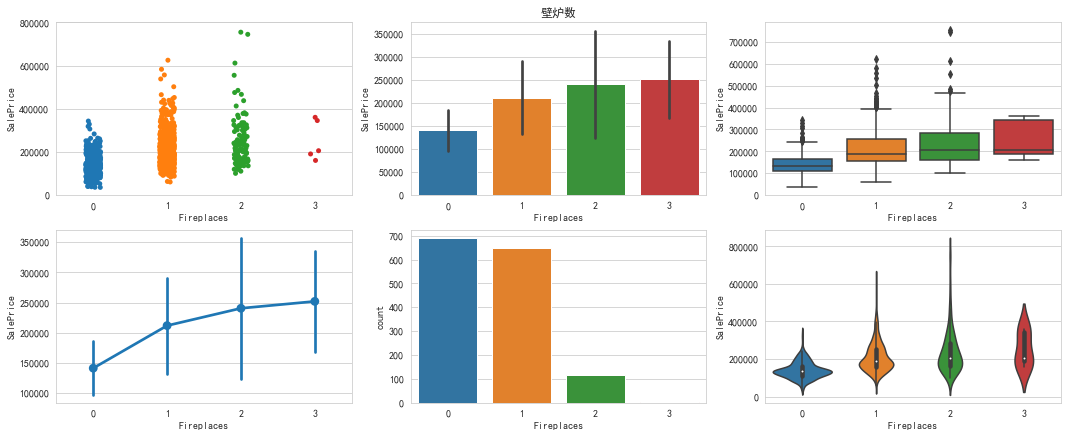

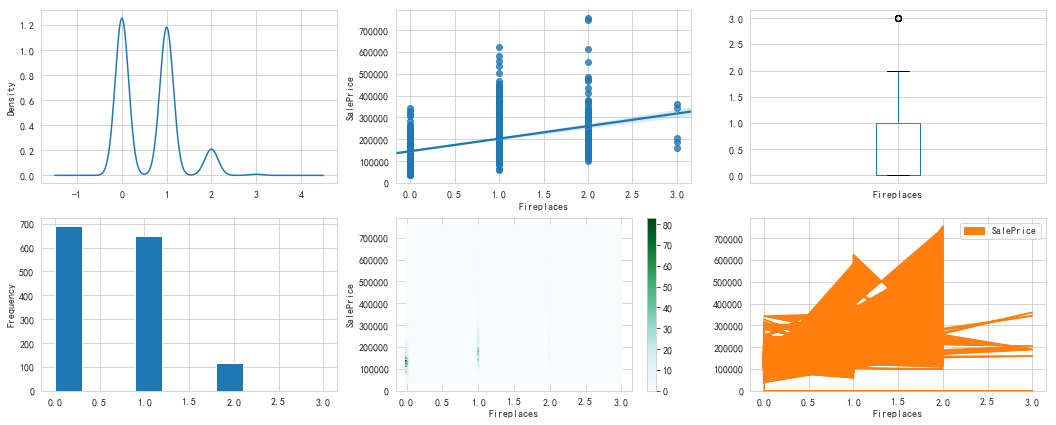

In [84]:
featereName = u'壁炉数'
featureId = 'Fireplaces'

showData(0,featereName,featureId)
showData(1,featereName,featureId)

#相对明显的特征

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


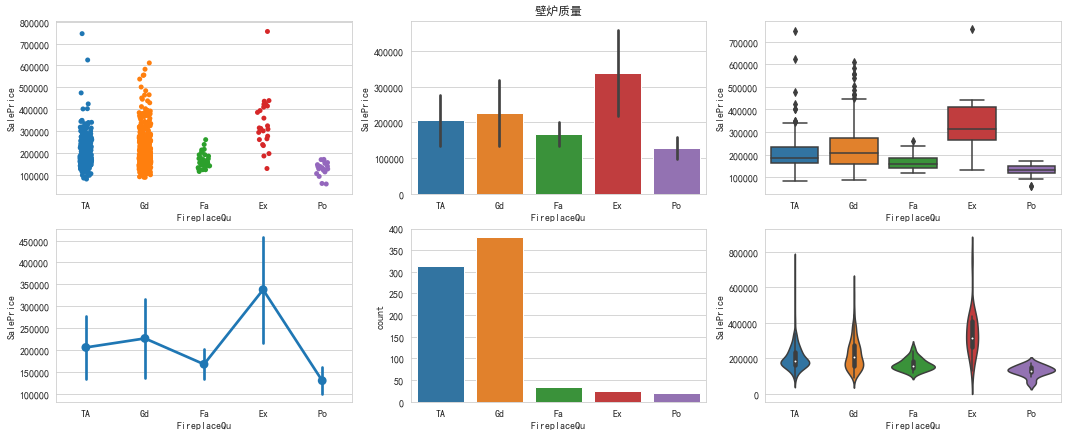

In [85]:
featereName = u'壁炉质量'
featureId = 'FireplaceQu'

showData(0,featereName,featureId)

#携带一些信息
#一半缺失

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


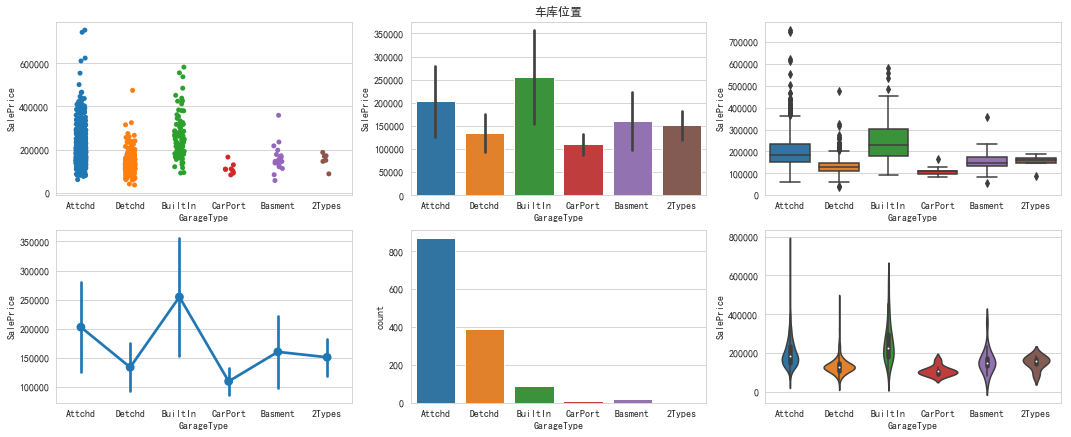

In [86]:
featereName = u'车库位置'
featureId = 'GarageType'

showData(0,featereName,featureId)

#有一些缺失值
#相对明显的特征

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


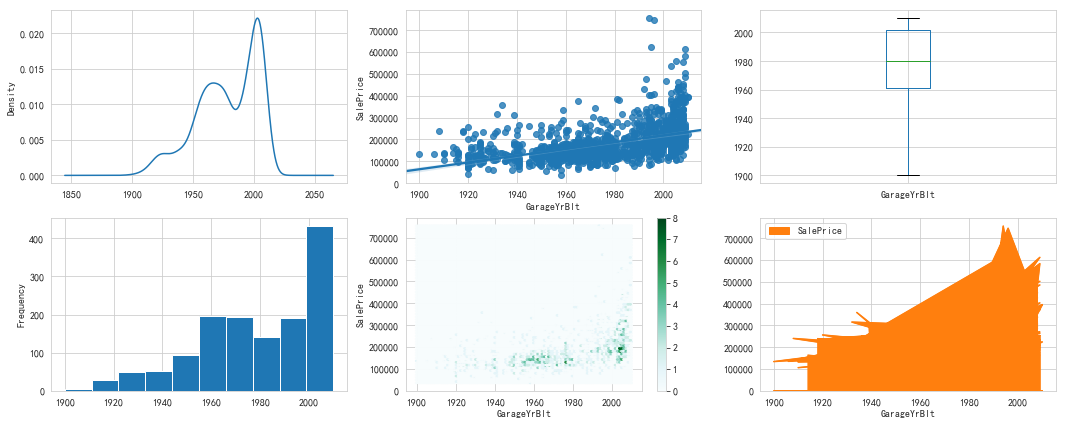

In [88]:
featereName = u'车库建成日期'
featureId = 'GarageYrBlt'

showData(1,featereName,featureId)

#有缺失值，携带一些信息

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
['RFn' 'Unf' 'Fin' nan]


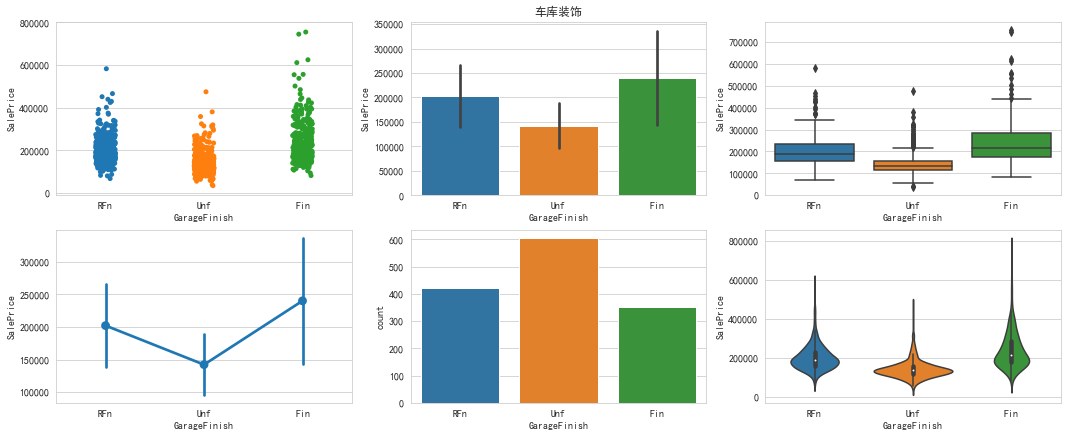

In [89]:
featereName = u'车库装饰'
featureId = 'GarageFinish'

showData(0,featereName,featureId)

#有一些缺失值
#携带一些信息

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
[2 3 1 0 4]
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


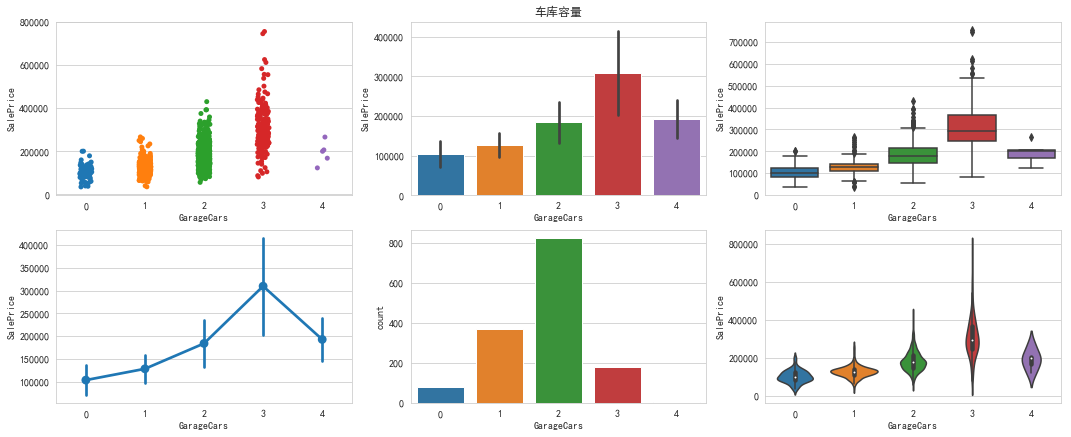

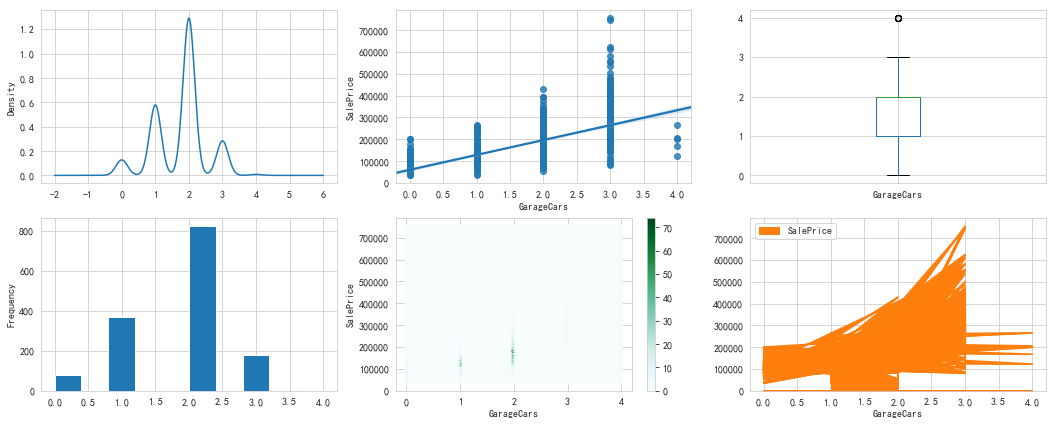

In [91]:
featereName = u'车库容量'
featureId = 'GarageCars'

showData(0,featereName,featureId)
showData(1,featereName,featureId)

#相对明显的信息
#部分类别分布不均

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


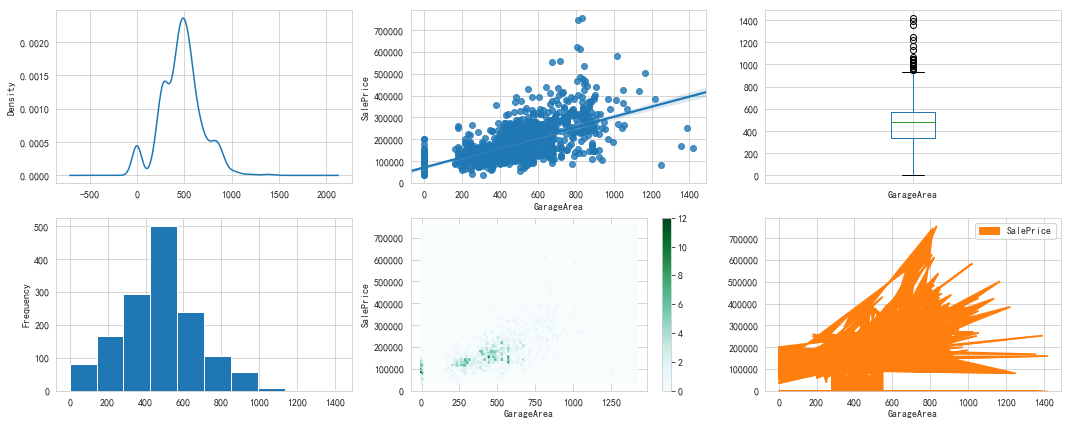

In [92]:
featereName = u'车库面积'
featureId = 'GarageArea'

showData(1,featereName,featureId)

#相对明显的信息

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


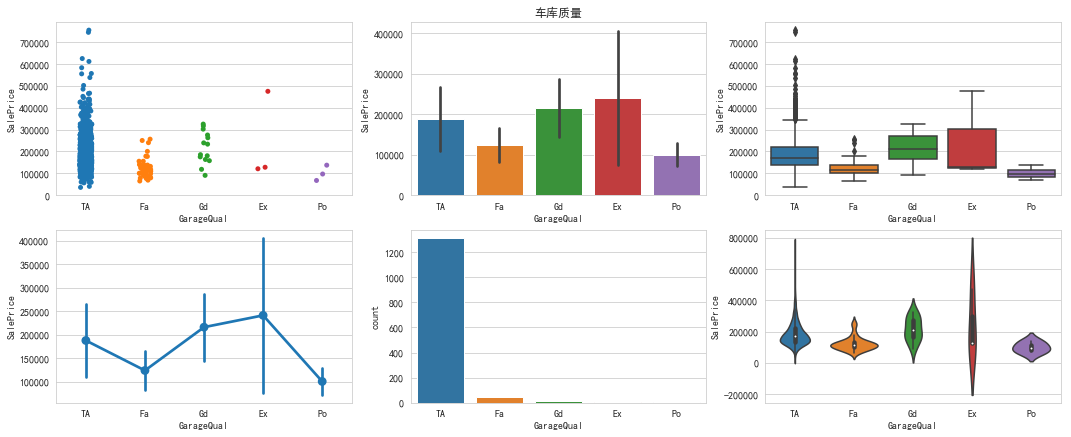

In [93]:
featereName = u'车库质量'
featureId = 'GarageQual'

showData(0,featereName,featureId)

#样本分布不好，建议弃用

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


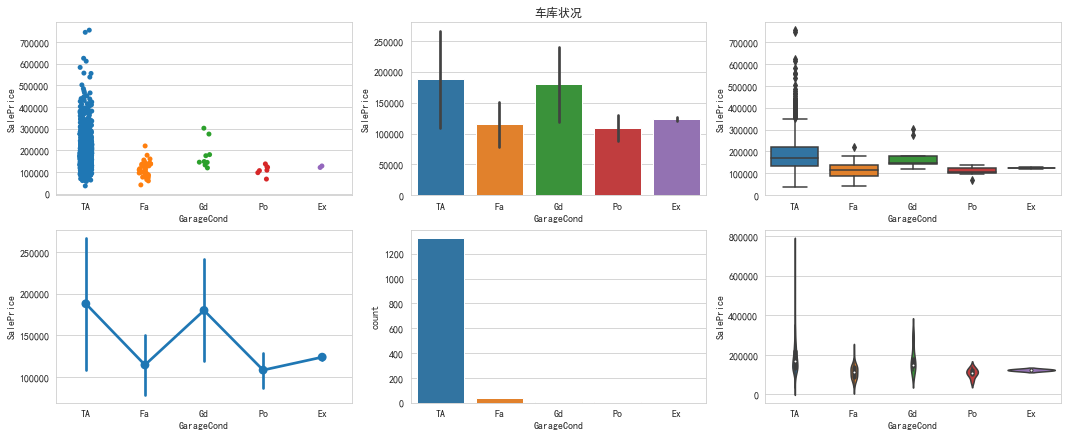

In [94]:
featereName = u'车库状况'
featureId = 'GarageCond'

showData(0,featereName,featureId)

#携带一些信息
#样本分布不均，建议弃用

count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object
['Y' 'N' 'P']


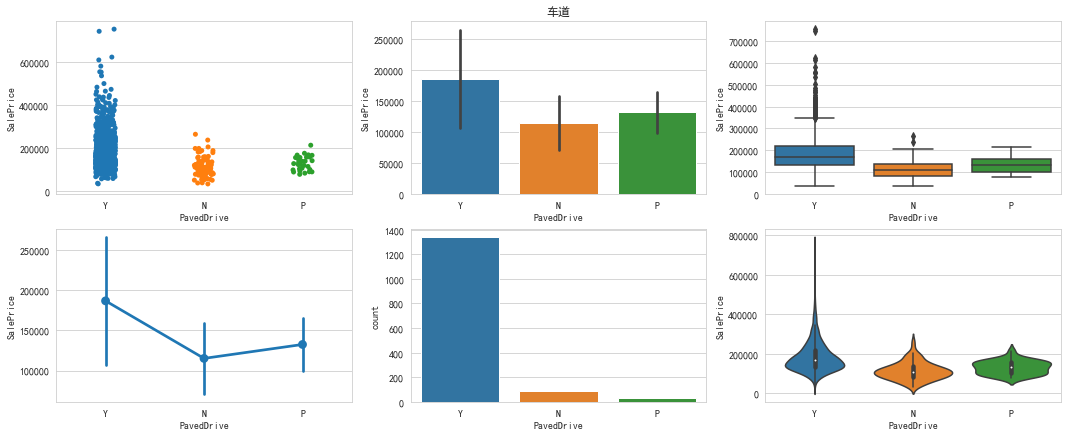

In [95]:
featereName = u'车道'
featureId = 'PavedDrive'

showData(0,featereName,featureId)

#样本分布不均，携带一些信息

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


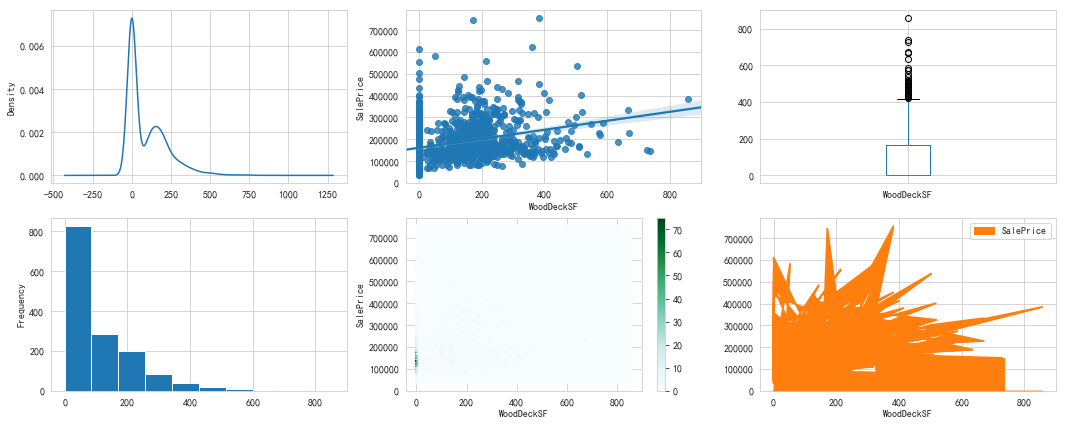

In [96]:
featereName = u'木板面积'
featureId = 'WoodDeckSF'

showData(1,featereName,featureId)

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


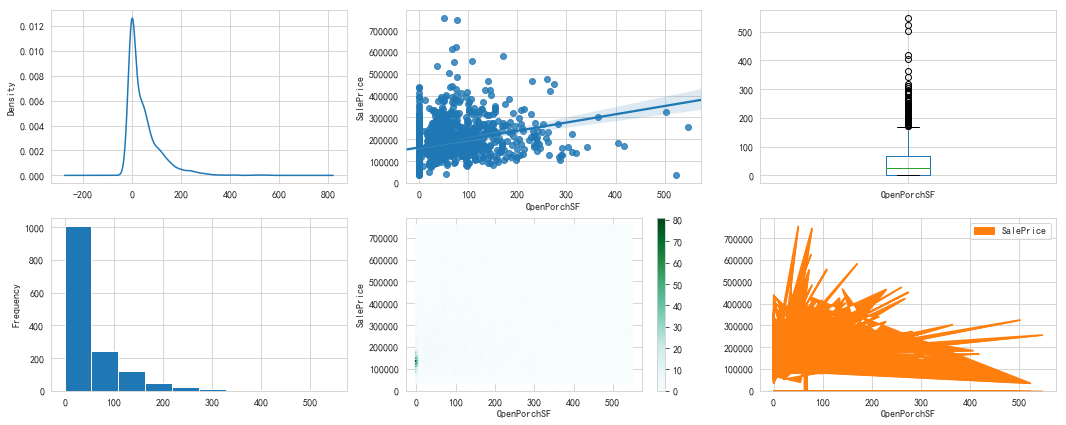

In [99]:
featereName = u'开放门廊面积'
featureId = 'OpenPorchSF'

showData(1,featereName,featureId)

#相对明显的属性

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


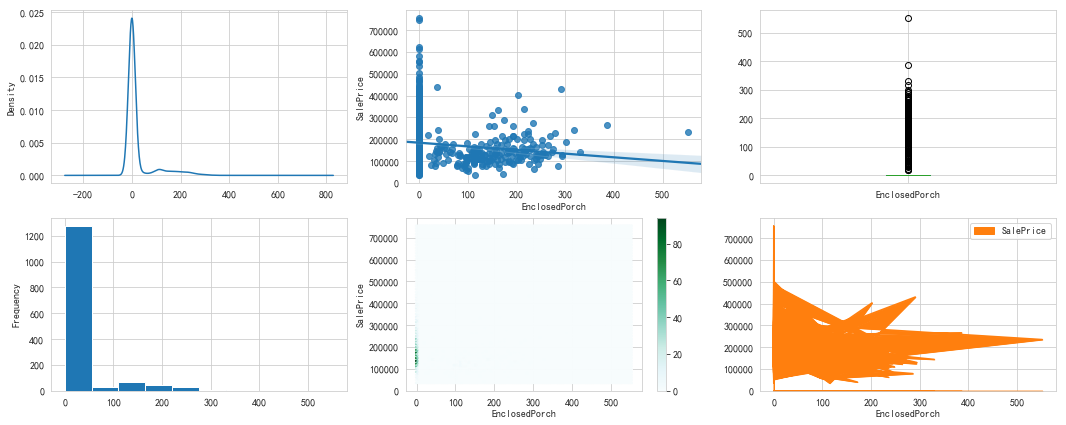

In [100]:
featereName = u'封闭门廊面积'
featureId = 'EnclosedPorch'

showData(1,featereName,featureId)

#看上去没有很明显的特征
#样本分布不均，可以考虑放弃

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


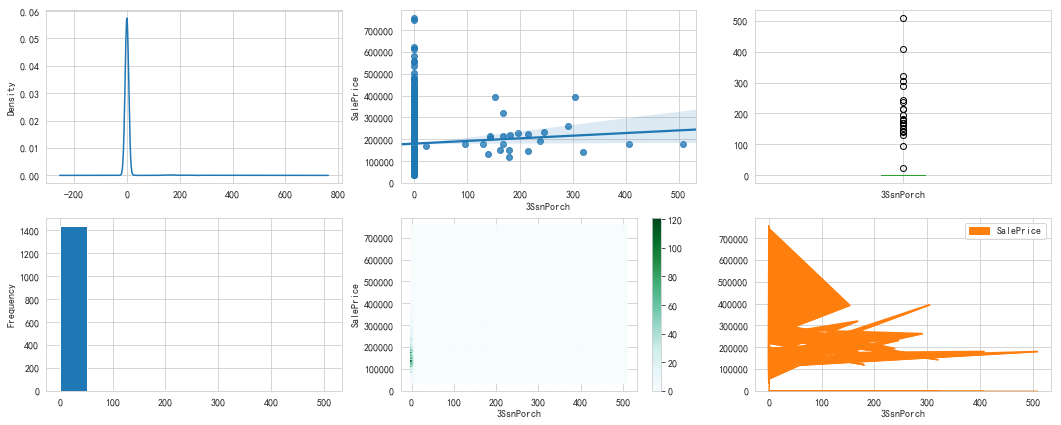

In [101]:
featereName = u'3个季节门廊面积'
featureId = '3SsnPorch'

showData(1,featereName,featureId)

#样本分布很不均匀，考虑放弃

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


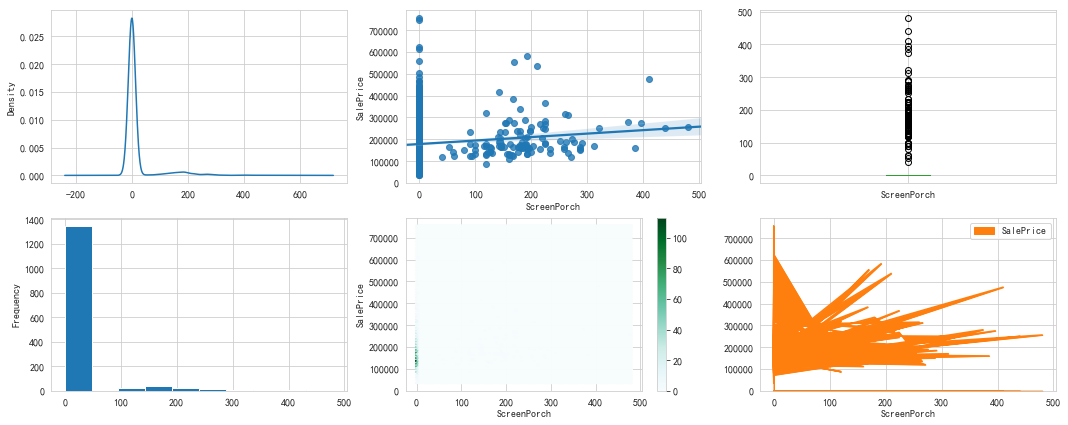

In [102]:
featereName = u'屏风门廊面积'
featureId = 'ScreenPorch'

showData(1,featereName,featureId)

#样本分布很不均匀，
#携带了一些信息
#考虑放弃

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


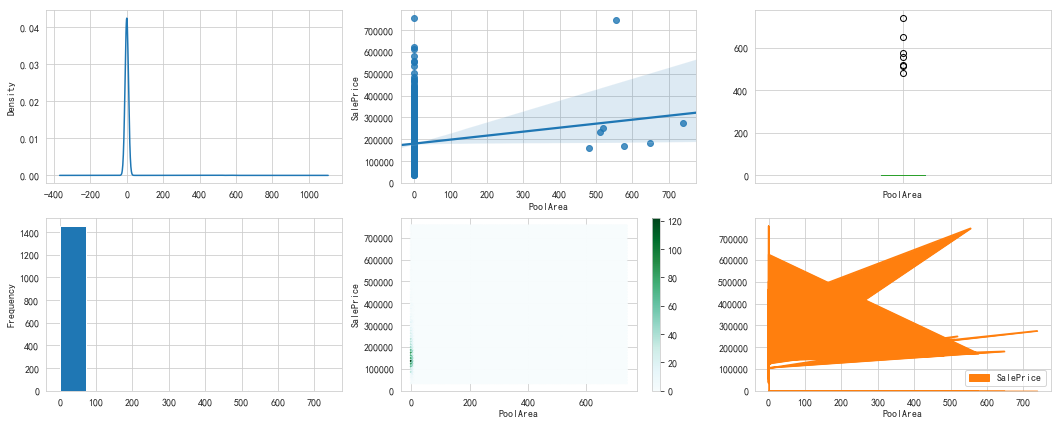

In [103]:
featereName = u'泳池面积'
featureId = 'PoolArea'

showData(1,featereName,featureId)

#样本分布很不均匀
#考虑放弃